# Python Exploratory Data Analysis

***
<center><font size="5"><b>
Jupyter Notebook and Data Preparation
</center></font></b>

***

### Importing Libraries:

In [393]:
### First import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

### Loading .csv file:

In [395]:
### Load the spotify.csv given in assignment
a = pd.read_csv('spotify-2023.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(a)

track_name  \
0                  Seven (feat. Latto) (Explicit Ver.)   
1                                                 LALA   
2                                              vampire   
3                                         Cruel Summer   
4                                       WHERE SHE GOES   
5                                             Sprinter   
6                                      Ella Baila Sola   
7                                             Columbia   
8                                             fukumean   
9                                      La Bebe - Remix   
10                                           un x100to   
11                                           Super Shy   
12                                             Flowers   
13                                            Daylight   
14                                           As It Was   
15                                           Kill Bill   
16                                   Cupid - Twin Ver.   
17   What Was I Made For? [From The Motion Picture ...   
18                                          Classy 101   
19                                          Like Crazy   
20                                           LADY GAGA   
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   
22                                    I Wanna Be Yours   
23            Peso Pluma: Bzrp Music Sessions, Vol. 55   
24   Popular (with Playboi Carti & Madonna) - The I...   
25                                         SABOR FRESA   
26                       Calm Down (with Selena Gomez)   
27                                        MOJABI GHOST   
28                                          Last Night   
29             Dance The Night (From Barbie The Album)   
30                                                Rush   
31                                               TULUM   
32                                            Creepin'   
33                                           Anti-Hero   
34                                                 TQG   
35                                     Los del Espacio   
36                      Frï¿½ï¿½gil (feat. Grupo Front   
37                                         Blank Space   
38                                               Style   
39                                                 TQM   
40                                             El Azul   
41       Sunflower - Spider-Man: Into the Spider-Verse   
42                                     I'm Good (Blue)   
43                                       See You Again   
44    Barbie World (with Aqua) [From Barbie The Album]   
45                                     Angels Like You   
46                                     I Ain't Worried   
47                                         Die For You   
48                                             Starboy   
49                                 Die For You - Remix   
50                                            El Cielo   
51                                  Baby Don't Hurt Me   
52                                            AMARGURA   
53                        (It Goes Like) Nanana - Edit   
54                                        Another Love   
55                                     Blinding Lights   
56                                           Moonlight   
57                                          La Bachata   
58                                                 S91   
59                                            cardigan   
60                                              Tï¿½ï¿   
61                                  Boy's a liar Pt. 2   
62             Left and Right (Feat. Jung Kook of BTS)   
63                                                BESO   
64                                             Hey Mor   
65                                              Yellow   
66                                               Karma   
67                                              People   
68                                        

#### Bar Graph Function:

In [437]:
### setup function for bar graph to reduce typing
def barg(ey,bee,si,di,ee):
    plt.figure(figsize=(15, 6))
    sns.barplot(data=ey, x=bee, y=si)
    plt.title(di, fontsize=30, fontweight='bold')
    plt.ylabel(ee)
    plt.xlabel('')
    plt.grid(True)
    return plt.show()

#### Violin Graph Function:

In [465]:
### Set up violin plot function 
def bayolin(ei,bi,de):
    plt.figure(figsize=(10, 20))
    sns.violinplot(data=a, x=ei, y='key', hue="mode")
    plt.title(bi, fontsize=30, fontweight='bold')
    plt.ylabel('Key')
    plt.xlabel(de)
    plt.grid(True)

#### Function for Finding the Largest Amount in a Column:

In [471]:
### Function to find the most amount in a column
def larg(x):
    playlist = a[x].nlargest(1).index
    top = a.loc[playlist]
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
        return display(top)

#### Function to Convert Columns to Their Respective Names:

In [483]:
### setup function  to convert numerical values to names, while disregarding those with 0 value. 
def char(x):
    ey[x] = ey.apply(lambda row: row['artist(s)_name'] if pd.notna(row['artist(s)_name']) and row[x] not in [0, 'NaN'] else row[x], axis=1)

### then apply said function to all the charts
char('in_spotify_charts')
char('in_apple_charts')
char('in_deezer_charts')
char('in_shazam_charts')

***
<center><font size="5"><b>
Data Analysis Programming
</center></font></b>

***

### Finding the Dimensions (row, column):

In [397]:
### using shape function we find 953 columns and 24 columns
print(a.shape)

(953, 24)


### Finding the Associated Data Type with Each Column (Pre-analysis):

In [399]:
### Identifying data types associated with each column
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Converting Object Dtypes to Float (For analysis purposes):

In [401]:
### Convert object Dtypes to float so they can use the mathematical functions of pandas
a['streams']= pd.to_numeric(a['streams'],errors='coerce')
a['in_deezer_playlists'] = a['in_deezer_playlists'].str.replace(',', '', regex=False)
a['in_deezer_playlists']= pd.to_numeric(a['in_deezer_playlists'],errors='coerce')
a['in_shazam_charts'] = a['in_shazam_charts'].str.replace(',', '', regex=False)
a['in_shazam_charts']= pd.to_numeric(a['in_shazam_charts'],errors='coerce')
pd.set_option('display.float_format', '{:.2f}'.format)

### Identifying Tracks with Missing Info:

In [403]:
### Identify rows with missing values as a dataframe
rows_with_nan = a[a.isna().any(axis=1)]
result = a.loc[rows_with_nan.index]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(result)

track_name  \
12                                             Flowers   
14                                           As It Was   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Espacio   
44    Barbie World (with Aqua) [From Barbie The Album]   
46                                     I Ain't Worried   
54                                        Another Love   
55                                     Blinding Lights   
58                                                 S91   
59                                            cardigan   
71                                          Heat Waves   
73                                     Sweater Weather   
86                                   Someone You Loved   
124                                     Por las Noches   
127                                   Watermelon Sugar   
134                                                505   
135  Calling (Spider-Man: Across the Spider-Verse) ...   
144                                              QUEMA   
151                                                Bye   
152                                       Danza Kuduro   
156                      Jimmy Cooks (feat. 21 Savage)   
158                                              Ghost   
159                                Under The Influence   
161                                           Gasolina   
164                                    Save Your Tears   
169                                When I Was Your Man   
178                                               SNAP   
180                                      Night Changes   
181                                      Fin de Semana   
187                                            Circles   
195                       Have You Ever Seen The Rain?   
243                                        Unstoppable   
259                          MIENTRAS ME CURO DEL CORA   
274                                            Shivers   
281                                           No Se Va   
287                                   Set Me Free Pt.2   
290                                          Shut Down   
310       Save Your Tears (with Ariana Grande) (Remix)   
314                                      Midnight Rain   
320                                 Gangsta's Paradise   
325                                          The Hills   
330                                                Low   
332                         Tormenta (feat. Bad Bunny)   
354                                         Monotonï¿½   
363                                       Vista Al Mar   
373                        Born With A Beer In My Hand   
379                                 Devil Donï¿½ï¿½ï¿½   
381                       I'm Not Here To Make Friends   
385                          VIBE (feat. Jimin of BTS)   
392                                          Calm Down   
395                                         Space Song   
396  Dreamers [Music from the FIFA World Cup Qatar ...   
403                           One Kiss (with Dua Lipa)   
405                                         Pink Venom   
409                           Eu Gosto Assim - Ao Vivo   
410                  INDUSTRY BABY (feat. Jack Harlow)   
413                                           PUNTO 40   
429                                         Bad Habits   
434                                              Woman   
438                       Kesariya (From "Brahmastra")   
440                                           Payphone   
441                    All I Want for Christmas Is You   
442                                     Last Christmas   
443                  Rockin' Around The Christmas Tree   
444                                   Jingle Bell Rock   
446                                      Santa Tell Me   
449                                            Snowman   
459           A Holly Jolly Christmas - Si

In [525]:
### Finding out how many are missing values
print(result.shape)

(137, 24)


### Getting the Mean, Median, and Mode of the Data Frame:

#### Mean:

In [405]:
### Finding the mean for all the numerical values
print(a.mean(numeric_only=True))

artist_count                   1.56
released_year               2018.24
released_month                 6.03
released_day                  13.93
in_spotify_playlists        5200.12
in_spotify_charts             12.01
streams                514137424.94
in_apple_playlists            67.81
in_apple_charts               51.91
in_deezer_playlists          385.19
in_deezer_charts               2.67
in_shazam_charts              60.00
bpm                          122.54
danceability_%                66.97
valence_%                     51.43
energy_%                      64.28
acousticness_%                27.06
instrumentalness_%             1.58
liveness_%                    18.21
speechiness_%                 10.13
dtype: float64


#### Median:


In [407]:
### Find the middle values of each numerical category
print(a.median(numeric_only=True))

artist_count                   1.00
released_year               2022.00
released_month                 6.00
released_day                  13.00
in_spotify_playlists        2224.00
in_spotify_charts              3.00
streams                290530915.00
in_apple_playlists            34.00
in_apple_charts               38.00
in_deezer_playlists           44.00
in_deezer_charts               0.00
in_shazam_charts               2.00
bpm                          121.00
danceability_%                69.00
valence_%                     51.00
energy_%                      66.00
acousticness_%                18.00
instrumentalness_%             0.00
liveness_%                    12.00
speechiness_%                  6.00
dtype: float64


#### Mode:

In [409]:
### Find the most frequently appearing numeric value in the columns
print(a.mode(numeric_only=True))

   artist_count  released_year  released_month  released_day  \
0          1.00        2022.00            1.00          1.00   
1           NaN            NaN             NaN           NaN   
2           NaN            NaN             NaN           NaN   
3           NaN            NaN             NaN           NaN   
4           NaN            NaN             NaN           NaN   
5           NaN            NaN             NaN           NaN   
6           NaN            NaN             NaN           NaN   
7           NaN            NaN             NaN           NaN   
8           NaN            NaN             NaN           NaN   
9           NaN            NaN             NaN           NaN   

   in_spotify_playlists  in_spotify_charts       streams  in_apple_playlists  \
0                    86               0.00  156338624.00                0.00   
1                   356                NaN  395591396.00                 NaN   
2                   685                NaN  723894473.0

### Finding the Artist Count Distribution Per Year:

In [411]:
### For this, we find the frequency based on year of release
c = a.loc[:,['artist_count','released_year']]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(c)

artist_count  released_year
0               2           2023
1               1           2023
2               1           2023
3               1           2019
4               1           2023
5               2           2023
6               2           2023
7               1           2023
8               1           2023
9               2           2023
10              2           2023
11              1           2023
12              1           2023
13              1           2023
14              1           2022
15              1           2022
16              1           2023
17              1           2023
18              2           2023
19              1           2023
20              3           2023
21              1           2023
22              1           2013
23              2           2023
24              3           2023
25              1           2023
26              2           2022
27              2           2023
28              1           2023
29              1           2023
30              1           2023
31              2           2023
32              3           2022
33              1           2022
34              2           2023
35              8           2023
36              2           2023
37              1           2014
38              1           2014
39              1           2023
40              2           2023
41              2           2018
42              2           2022
43              3           2017
44              3           2023
45              1           2020
46              1           2022
47              1           2016
48              2           2016
49              2           2023
50              3           2023
51              3           2023
52              1           2023
53              1           2023
54              1           2012
55              1           2019
56              1           2023
57              1           2022
58              1           2023
59              1           2020
60              2           2023
61              2           2023
62              3           2022
63              2           2023
64              2           2022
65              1           1999
66              1           2022
67              1           2022
68              1           2023
69              1           2023
70              2           2023
71              1           2020
72              1           2022
73              1           2012
74              2           2022
75              1           2008
76              1           2022
77              2           2022
78              2           2022
79              1           2023
80              1           1975
81              2           2022
82              2           2023
83              1           2023
84              2           2021
85              2           2023
86              1           2018
87              2           2022
88              1           2015
89              2           2012
90              1           2023
91              1           2023
92              2           2023
93              1           2017
94              1           2020
95              2           2023
96              1           2023
97              1           2022
98              1           2011
99              1           2023
100             1           2012
101             3           2022
102             1           2023
103             1           2004
104             1           2023
105             1           2022
106             3           2017
107             1           2017
108             1           2021
109             1           2011
110             2           2012
111             1           2022
112             2           2023
113             1           2023
114             1           1985
115             1           2014
116             1           2023
117             2           2023
118             3           2023
119             1           2020
120         

#### Artist Count-Year Distribution Histogram:

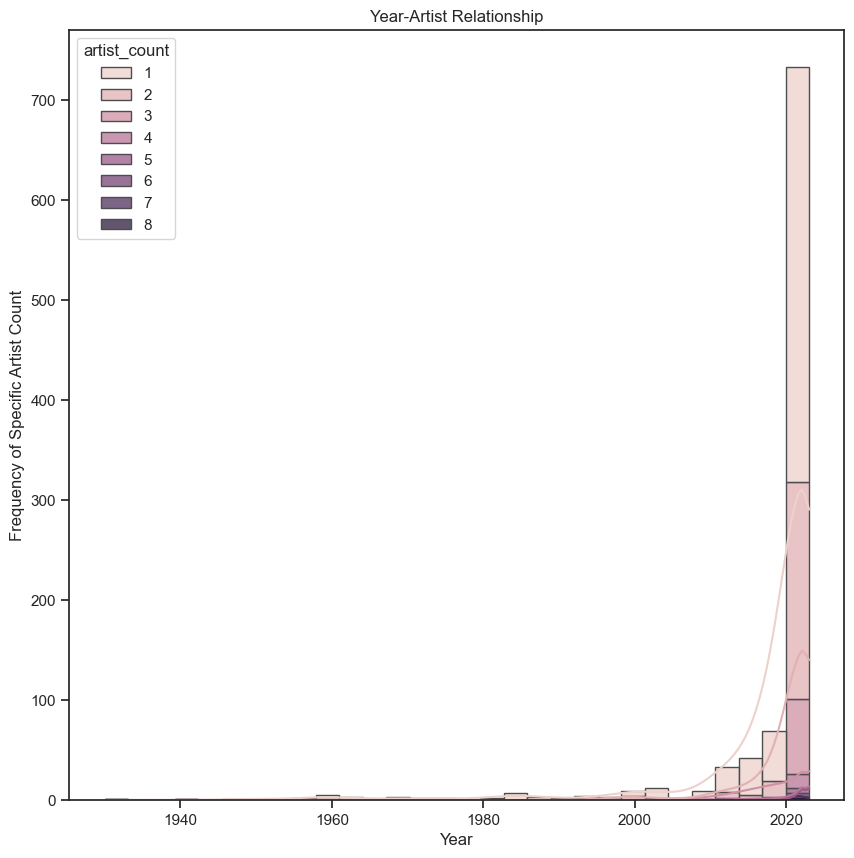

In [537]:
### Plot histogram of most amount of artist counts based on year
plt.subplots(figsize=(10, 10)) ### Set Figure Size to fit the needed data without looking too crammed
sns.histplot(data= c, x='released_year', hue='artist_count', multiple= 'stack', bins=30, edgecolor= '.3', alpha= 0.75, kde=True)
### Setup histogram

plt.title('Year-Artist Relationship') ### Set labels
plt.xlabel('Year')
plt.ylabel('Frequency of Specific Artist Count')
plt.show()

### Getting the Top 5 (and Bottom 5) Tracks Based on Streams:

In [419]:
### Get the top 5 songs based on stream
streamed = a['streams'].nlargest(5).index ### .nlargest function
topfive = a.loc[streamed]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(topfive) ### display just to make sure

streame = a['streams'].nsmallest(5).index ### same process but using .nlargest function
botfive = a.loc[streame]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(botfive)

track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

     artist_count  released_year  released_month  released_day  \
55              1           2019              11            29   
179             1           2017               1             6   
86              1           2018              11             8   
620             1           2019               5            10   
41              2           2018              10             9   

     in_spotify_playlists  in_spotify_charts       streams  \
55                  43899                 69 3703895074.00   
179                 32181                 10 3562543890.00   
86                  17836                 53 2887241814.00   
620                 24529                  0 2864791672.00   
41                  24094                 78 2808096550.00   

     in_apple_playlists  in_apple_charts  in_deezer_playlists  \
55                  672              199                 3421   
179                  33                0                 6808   
86                  440              125                 1800   
620                 533              167                 3595   
41                  372              117                  843   

     in_deezer_charts  in_shazam_charts  bpm key   mode  danceability_%  \
55                 20               NaN  171  C#  Major              50   
179                 7              0.00   96  C#  Minor              83   
86                  0               NaN  110  C#  Major              50   
620                 6               NaN   98  F#  Minor              82   
41                  4             69.00   90   D  Major              76   

     valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
55          38        80               0                   0           9   
179         93        65              58                   0           9   
86          45        41              75                   0          11   
620         54        59              69                   0          18   
41          91        50              54                   0           7   

     speechiness_%  
55               7  
179              8  
86               3  
620             10  
41               5

track_name  \
123                  Que Vuelvas   
393            Jhoome Jo Pathaan   
144                        QUEMA   
142  Gol Bolinha, Gol Quadrado 2   
68                     Overdrive   

                                        artist(s)_name  artist_count  \
123                         Carin Leon, Grupo Frontera             2   
393  Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...             6   
144                       Sog, Ryan Castro, Peso Pluma             3   
142                                Mc Pedrinho, DJ 900             2   
68                                         Post Malone             1   

     released_year  released_month  released_day  in_spotify_playlists  \
123           2022              12             9                   763   
393           2022              12            22                   138   
144           2023               7            13                   437   
142           2023               6             1                   293   
68            2023               7            14                   410   

     in_spotify_charts     streams  in_apple_playlists  in_apple_charts  \
123                 26     2762.00                  21              110   
393                  4  1365184.00                  13               78   
144                 31 11599388.00                  17               29   
142                  8 11956641.00                   5                2   
68                  36 14780425.00                  36               32   

     in_deezer_playlists  in_deezer_charts  in_shazam_charts  bpm  key   mode  \
123                   21                 9             71.00  162   A#  Major   
393                    2                 0              0.00  105    G  Major   
144                   26                 3            208.00   97  NaN  Major   
142                   30                 2             66.00  133    B  Minor   
68                    31                 1             26.00  140   C#  Major   

     danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
123              49         78        64              19                   0   
393              82         62        74              10                   0   
144              79         92        89               5                   0   
142              93         68        65              42                   0   
68               56         48        73               0                   0   

     liveness_%  speechiness_%  
123          11              4  
393          33              7  
144           6              5  
142          12             25  
68           35              4

### Getting the 5 Most Frequently Appearing Artists:

In [421]:
### Getting the top 5 most frequently appearing artists
top_5 = a['artist(s)_name'].value_counts().head(5).index
fivetop = a.loc[a['artist(s)_name'].isin(top_5)]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(fivetop)

track_name artist(s)_name  \
3                                         Cruel Summer   Taylor Swift   
4                                       WHERE SHE GOES      Bad Bunny   
14                                           As It Was   Harry Styles   
15                                           Kill Bill            SZA   
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   Taylor Swift   
33                                           Anti-Hero   Taylor Swift   
37                                         Blank Space   Taylor Swift   
38                                               Style   Taylor Swift   
47                                         Die For You     The Weeknd   
55                                     Blinding Lights     The Weeknd   
59                                            cardigan   Taylor Swift   
66                                               Karma   Taylor Swift   
69                        Enchanted (Taylor's Version)   Taylor Swift   
83                 Back To December (Taylor's Version)   Taylor Swift   
93                                    Donï¿½ï¿½ï¿½t Bl   Taylor Swift   
97                                              Snooze            SZA   
100                                              Lover   Taylor Swift   
113                            Mine (Taylor's Version)   Taylor Swift   
119                                             august   Taylor Swift   
127                                   Watermelon Sugar   Harry Styles   
163                                          Enchanted   Taylor Swift   
164                                    Save Your Tears     The Weeknd   
175                                           Reminder     The Weeknd   
176                                       Shake It Off   Taylor Swift   
191            You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve   Taylor Swift   
192                                  Titi Me Preguntï¿      Bad Bunny   
193             Better Than Revenge (Taylor's Version)   Taylor Swift   
206                                     Hits Different   Taylor Swift   
237                                      Lavender Haze   Taylor Swift   
239                                             Efecto      Bad Bunny   
270                  All Of The Girls You Loved Before   Taylor Swift   
292                                   Call Out My Name     The Weeknd   
308                                 Late Night Talking   Harry Styles   
314                                      Midnight Rain   Taylor Swift   
325                                          The Hills     The Weeknd   
330                                                Low            SZA   
350                                     Nobody Gets Me            SZA   
362                                           Neverita      Bad Bunny   
371                                        After Hours     The Weeknd   
377                                        Moscow Mule      Bad Bunny   
386                                              Shirt            SZA   
416                                              Blind            SZA   
422                                           Yonaguni      Bad Bunny   
432                                          Good Days            SZA   
437                            You're On Your Own, Kid   Taylor Swift   
455                                     Seek & Destroy            SZA   
456                                      Love Language            SZA   
464                                            Special            SZA   
467                                                SOS            SZA   
472                                          Gone Girl            SZA   
473                                                F2F            SZA   
474                                          Notice Me            SZA   
480                                           I Hate U            SZA   
484                              Smoking on my Ex Pack            SZA   
485                          

#### Summary of the Top 5 Most Frequently Appearing Artist Based on the Data Frame:

In [423]:
print(top_5) ### Simplified top 5 frequency

Index(['Taylor Swift', 'The Weeknd', 'Bad Bunny', 'SZA', 'Harry Styles'], dtype='object', name='artist(s)_name')


### Getting the Number of Tracks Released in a Year:

In [425]:
trackperyear = a['released_year'].value_counts() ### Obtain the frequency of year of releases
datrack = trackperyear.reset_index()
datrack.columns = ['Year', 'Count'] ### Set as dataframe
display(datrack)

Year  Count
0   2022    402
1   2023    175
2   2021    119
3   2020     37
4   2019     36
5   2017     23
6   2016     18
7   2014     13
8   2013     13
9   2015     11
10  2018     10
11  2012     10
12  2011     10
13  2010      7
14  2002      6
15  1999      5
16  1984      4
17  2000      4
18  2004      4
19  1963      3
20  1958      3
21  1995      2
22  1970      2
23  1959      2
24  1985      2
25  1957      2
26  1986      2
27  2003      2
28  1991      2
29  2008      2
30  1975      2
31  1982      2
32  1946      1
33  2005      1
34  1942      1
35  1996      1
36  1998      1
37  1950      1
38  1979      1
39  2007      1
40  1952      1
41  1971      1
42  1994      1
43  1930      1
44  1973      1
45  1997      1
46  1968      1
47  1992      1
48  1983      1
49  1987      1

#### Tracks-Per-Year Line Graph:

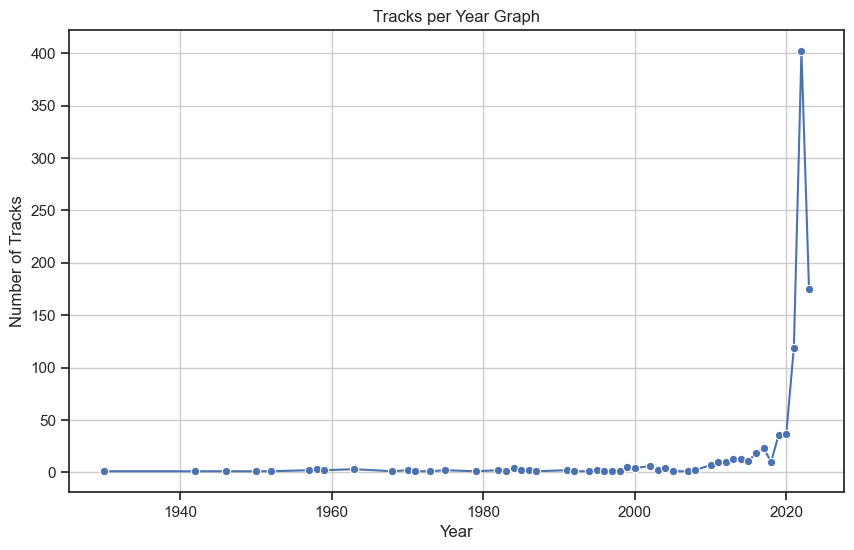

In [427]:
plt.figure(figsize=(10, 6)) ### Set figure size so line graph does not look cramped
sns.lineplot(data=datrack, x='Year', y='Count', marker='o') ### Line Plot to show number of tracks per year
plt.title('Tracks per Year Graph') 
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True) ### Show grid for easier viewing
plt.show()

### Track-Per-Month Data Frame:

In [429]:
trackpermonth = a['released_month'].value_counts() ### Get the most frequently appearing month 
trackframe = trackpermonth.reset_index()
trackframe.columns = ['Month', 'Count']
trackframe['Month'] = pd.to_datetime(trackframe['Month'], format='%m').dt.month_name() ### Convert numerical month to its corresponding name
display(trackframe)

Month  Count
0     January    134
1         May    128
2       March     86
3        June     86
4    November     80
5    December     75
6     October     73
7       April     66
8        July     62
9    February     61
10  September     56
11     August     46

#### Bar Graph Comparing the Number of Tracks Released Per Month:

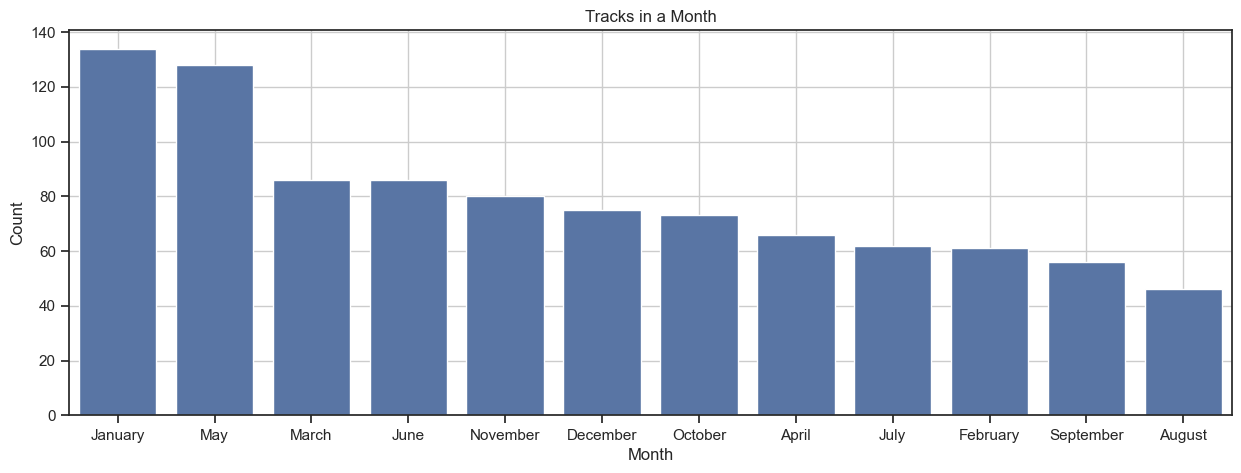

In [431]:
plt.figure(figsize=(15, 5)) ### Set large fig size 
sns.barplot(data=trackframe, x='Month', y='Count') ### Set a Bar plot to compare frequency 
plt.title('Tracks in a Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True) ### Grid to show comparison easier
plt.show()

### Getting the Attributes of the Top 5 and Bottom 5 Based on Streams:

In [435]:
### Get the characteristics of the top 5 and bottom 5 tracks
wok = topfive.loc[:,['track_name', 'streams', 'danceability_%', 'valence_%', 'energy_%' , 'acousticness_%', 'instrumentalness_%', 'liveness_%','speechiness_%']]
kow = botfive.loc[:,['track_name', 'streams', 'danceability_%', 'valence_%', 'energy_%' , 'acousticness_%', 'instrumentalness_%', 'liveness_%','speechiness_%']]
display(wok)
display(kow)

track_name       streams  \
55                                 Blinding Lights 3703895074.00   
179                                   Shape of You 3562543890.00   
86                               Someone You Loved 2887241814.00   
620                                   Dance Monkey 2864791672.00   
41   Sunflower - Spider-Man: Into the Spider-Verse 2808096550.00   

     danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
55               50         38        80               0                   0   
179              83         93        65              58                   0   
86               50         45        41              75                   0   
620              82         54        59              69                   0   
41               76         91        50              54                   0   

     liveness_%  speechiness_%  
55            9              7  
179           9              8  
86           11              3  
620          18             10  
41            7              5

track_name     streams  danceability_%  valence_%  \
123                  Que Vuelvas     2762.00              49         78   
393            Jhoome Jo Pathaan  1365184.00              82         62   
144                        QUEMA 11599388.00              79         92   
142  Gol Bolinha, Gol Quadrado 2 11956641.00              93         68   
68                     Overdrive 14780425.00              56         48   

     energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
123        64              19                   0          11              4  
393        74              10                   0          33              7  
144        89               5                   0           6              5  
142        65              42                   0          12             25  
68         73               0                   0          35              4

#### Comparing the Attributes of the Top 5 Using Bar Graphs:

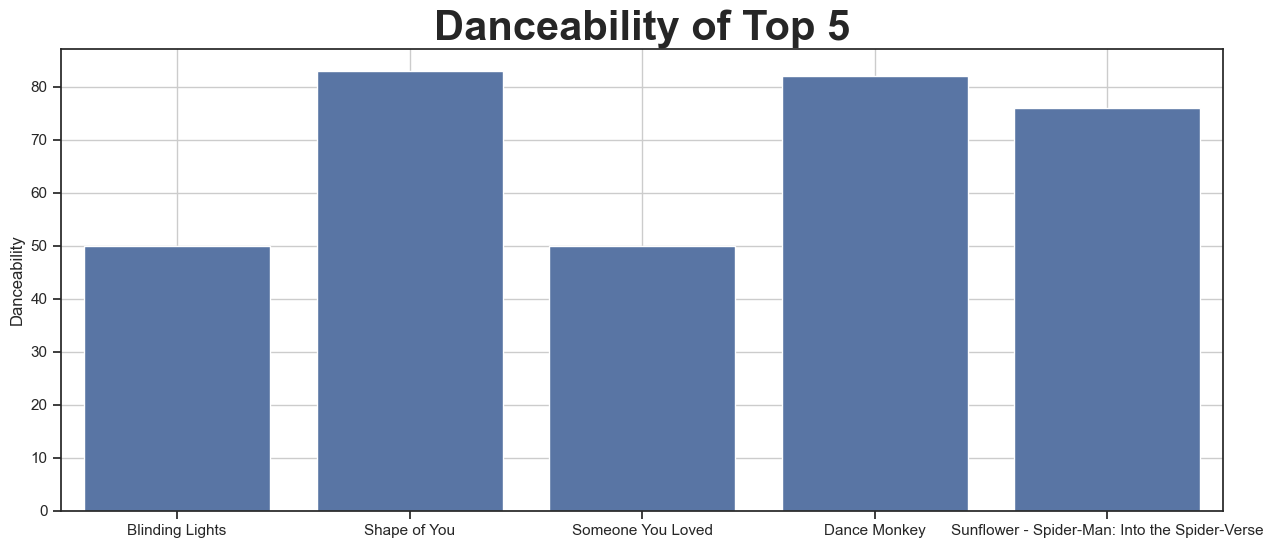

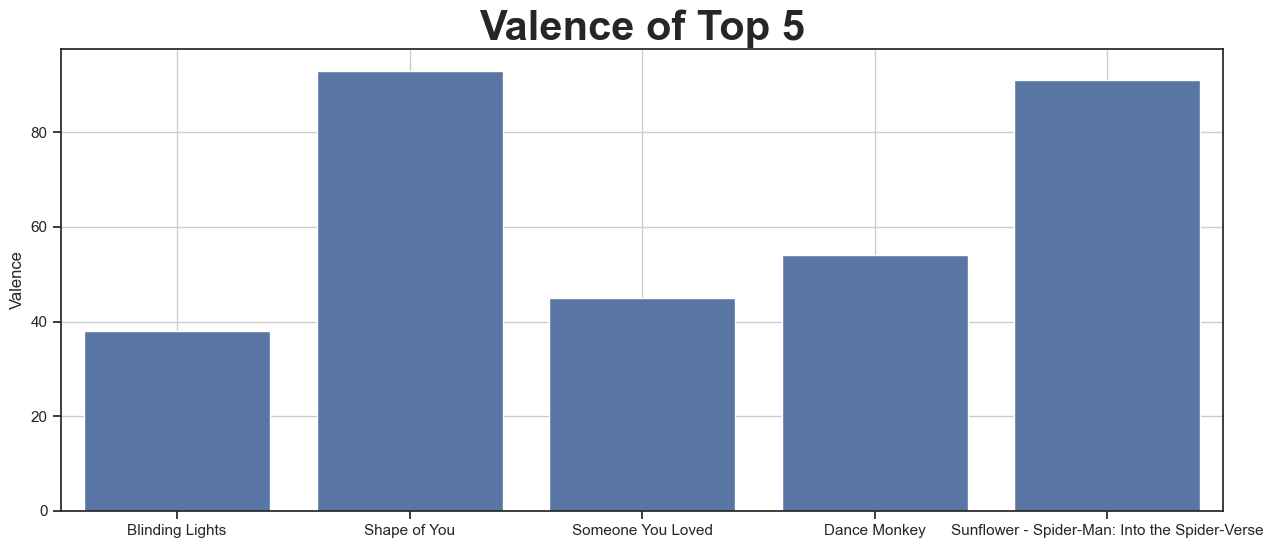

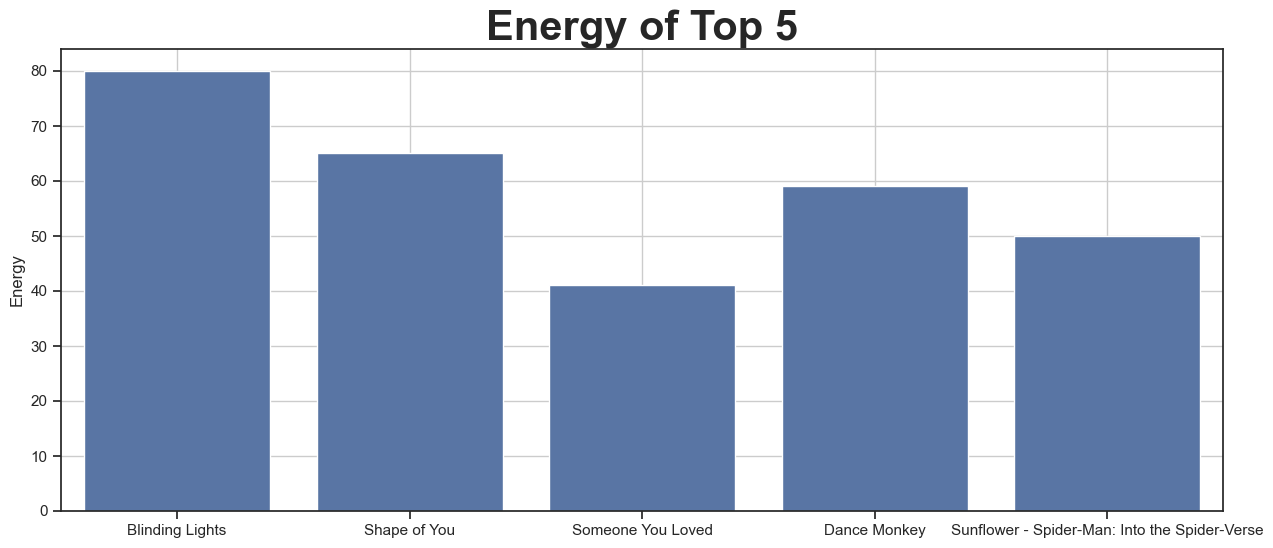

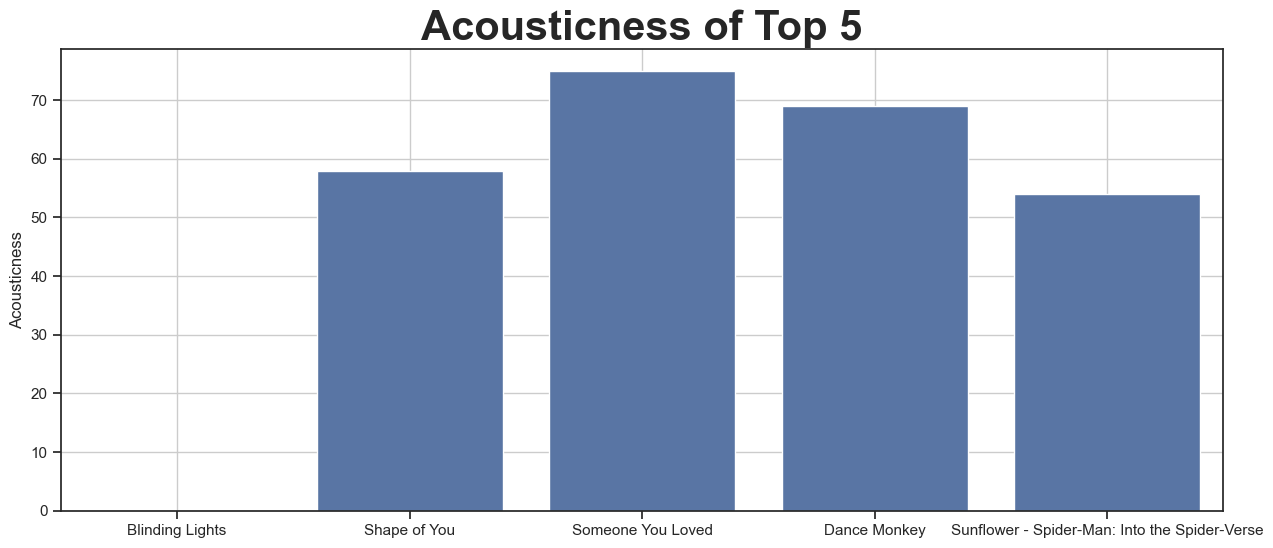

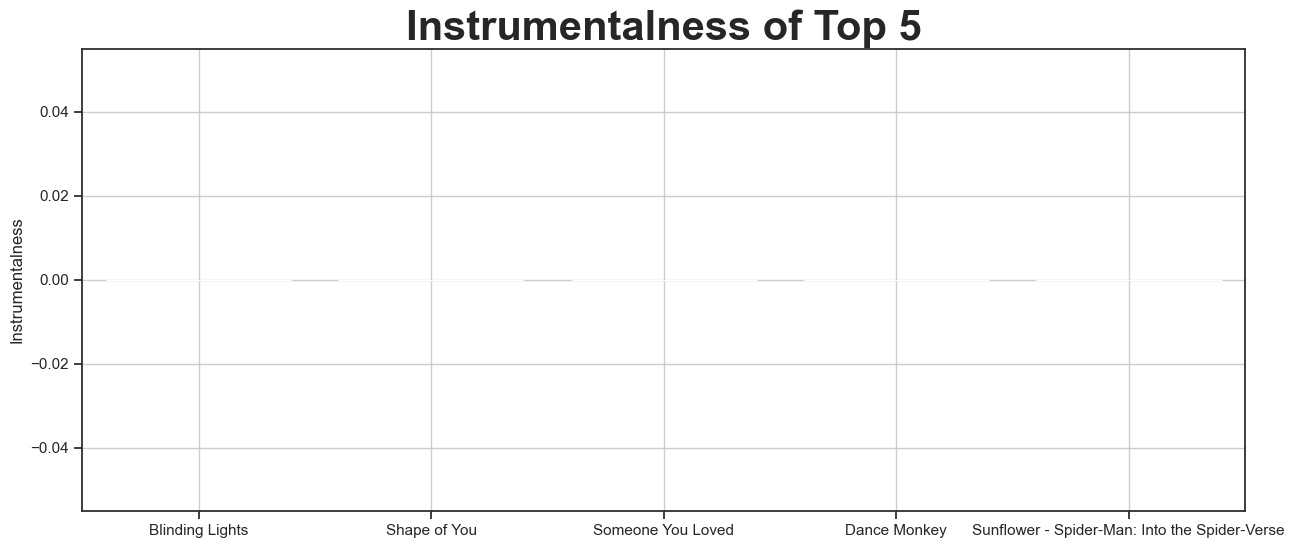

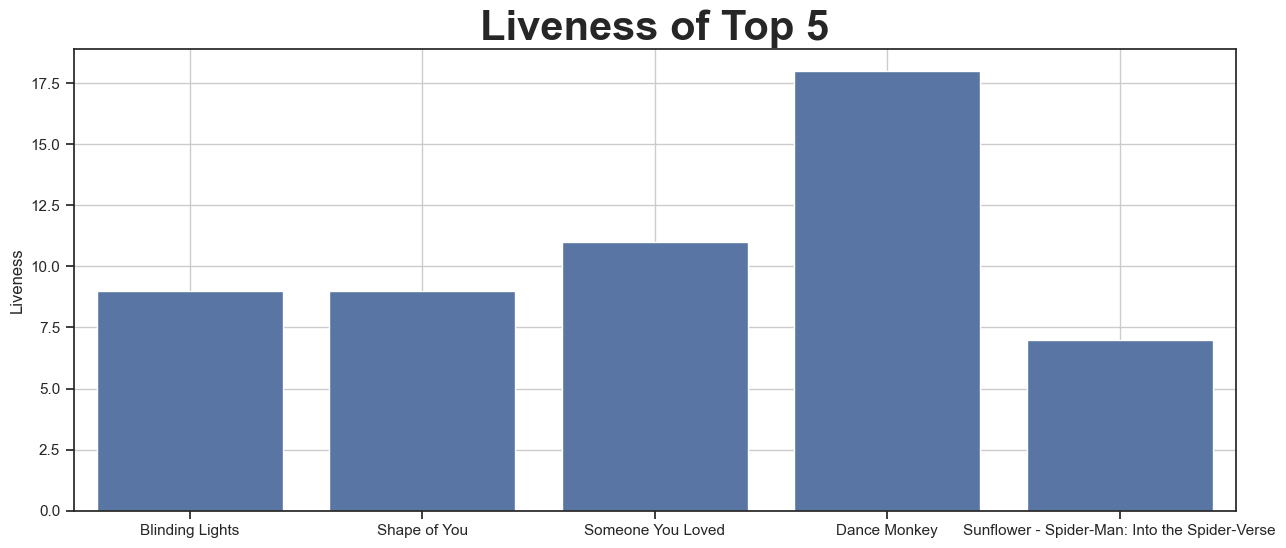

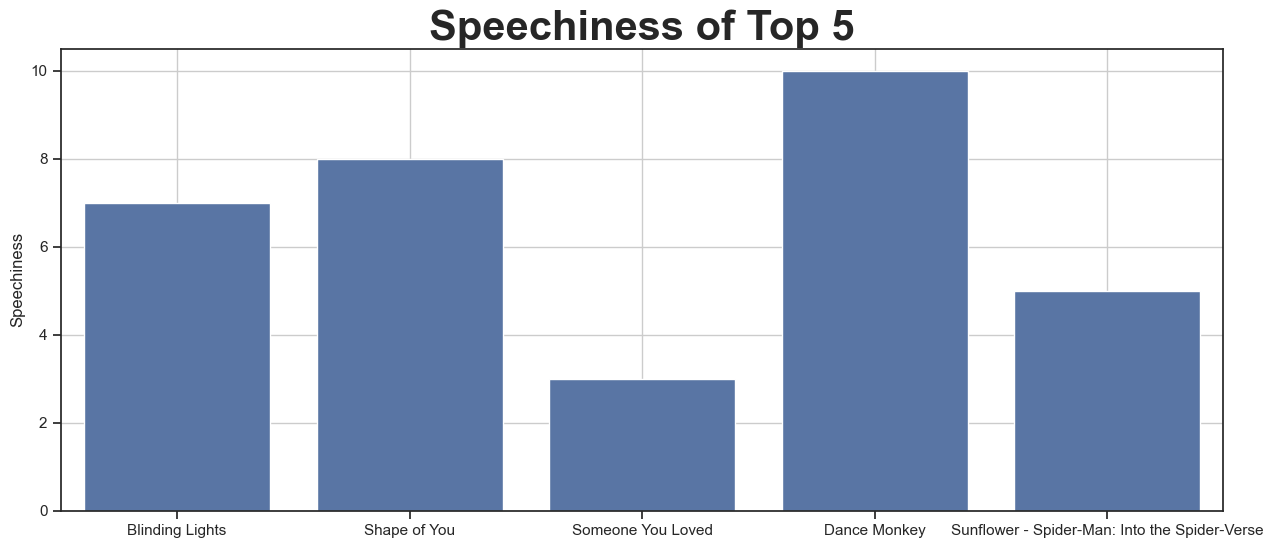

In [439]:
### Bar graphs to compare the various attributes of each track using the defined function
barg(wok,'track_name','danceability_%','Danceability of Top 5','Danceability')
barg(wok,'track_name','valence_%','Valence of Top 5','Valence')
barg(wok,'track_name','energy_%','Energy of Top 5','Energy')
barg(wok,'track_name','acousticness_%','Acousticness of Top 5','Acousticness')
barg(wok,'track_name','instrumentalness_%','Instrumentalness of Top 5','Instrumentalness')
barg(wok,'track_name','liveness_%','Liveness of Top 5','Liveness')
barg(wok,'track_name','speechiness_%','Speechiness of Top 5','Speechiness')

#### Comparing the Attributes of the Bottom 5 Using Bar Graphs:

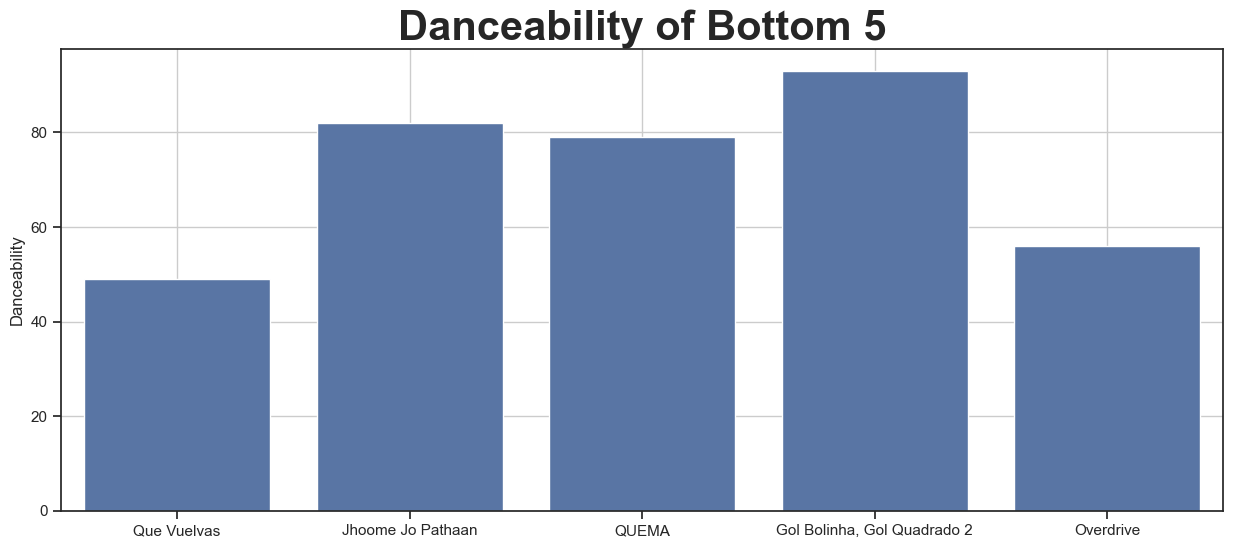

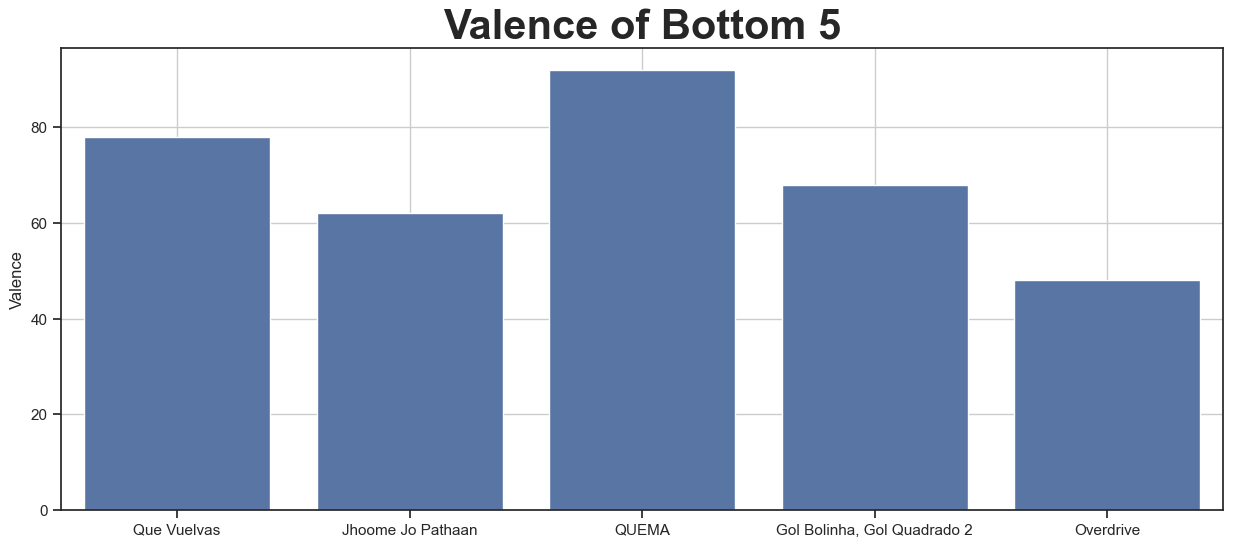

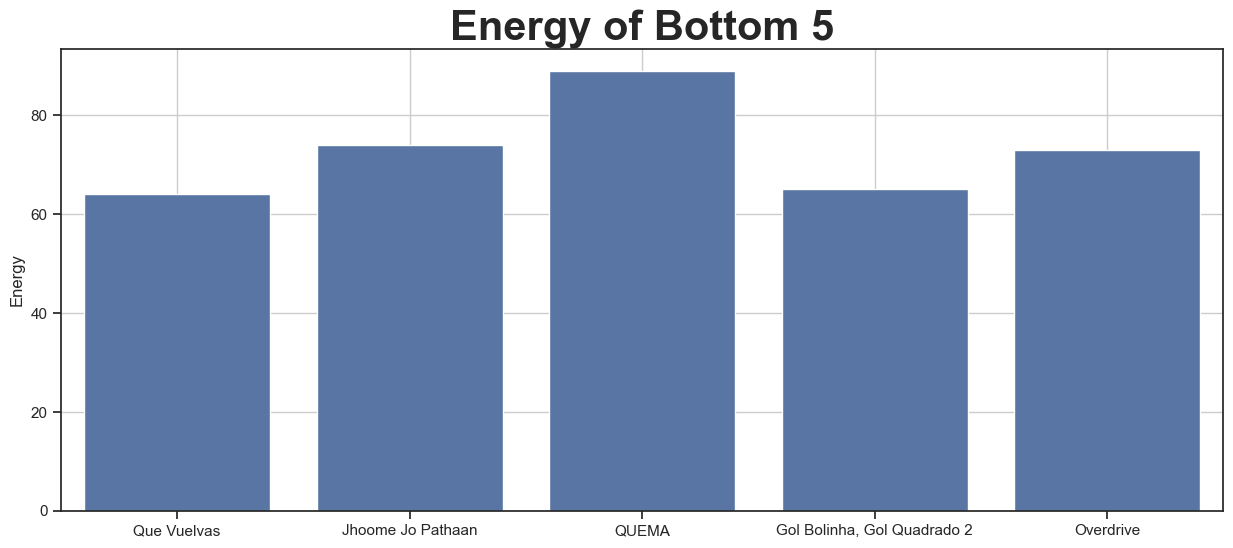

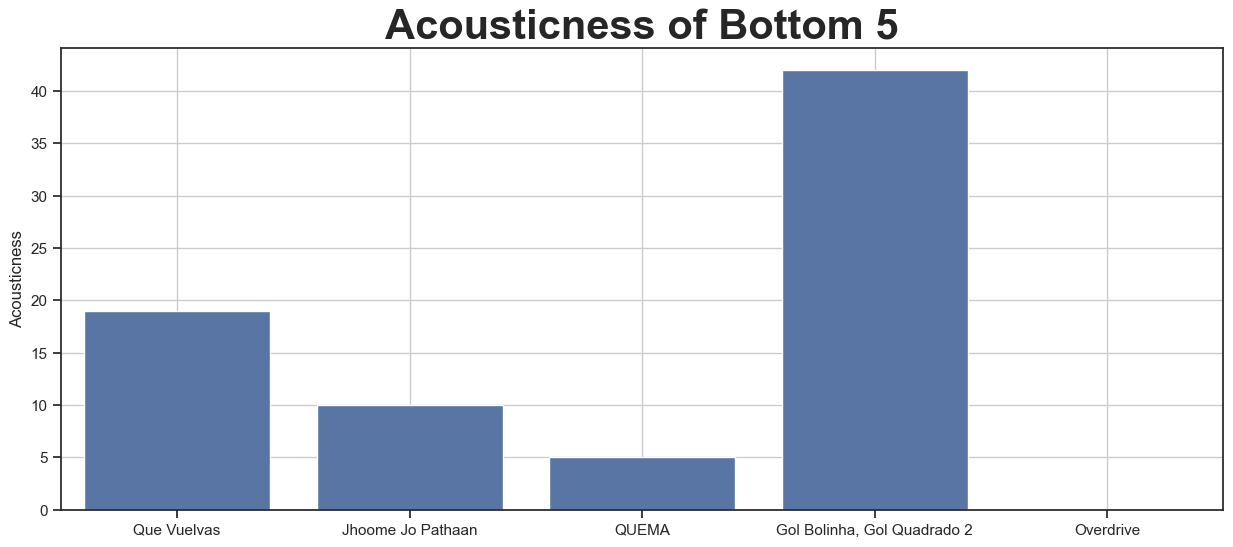

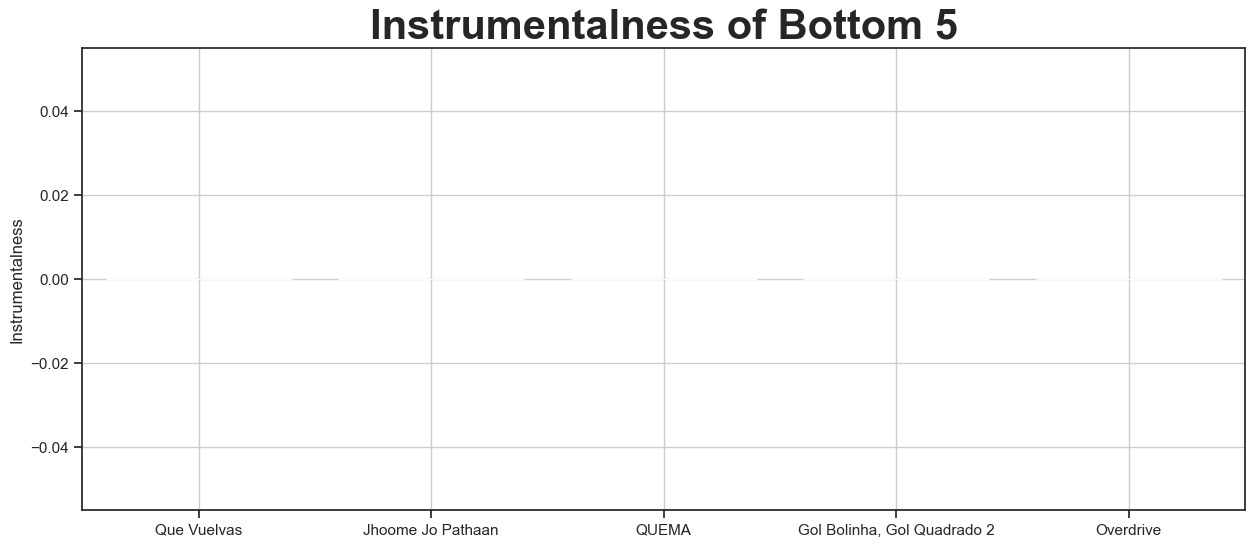

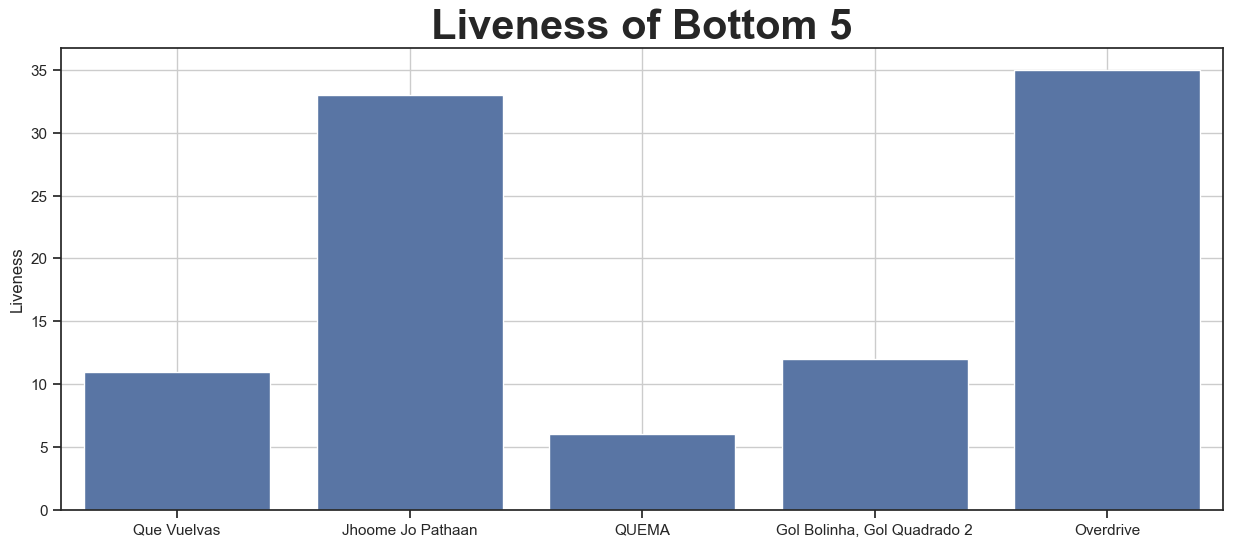

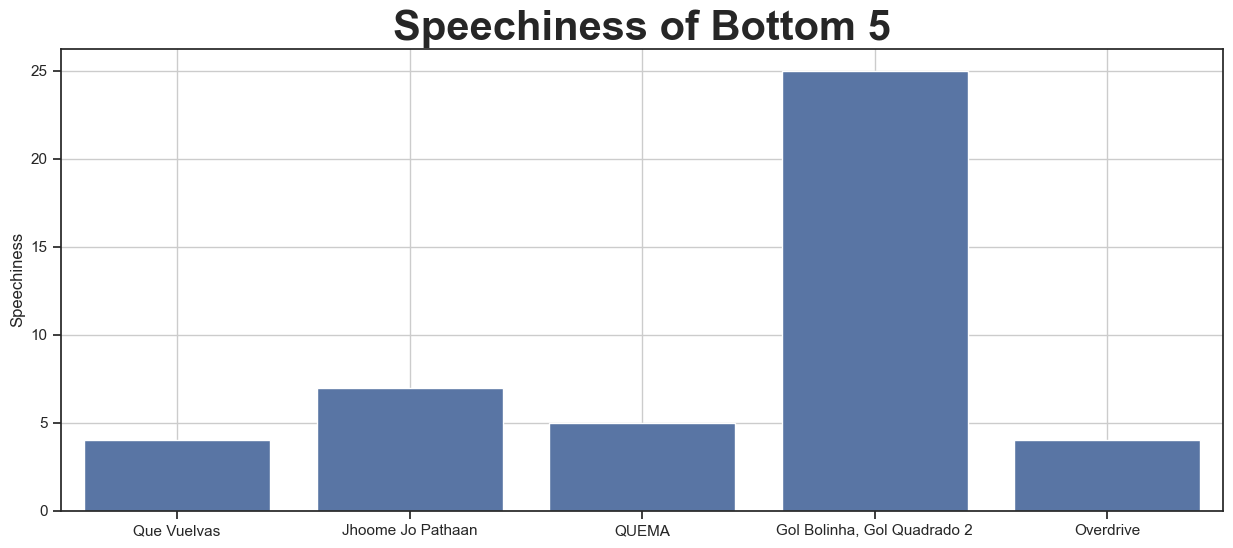

In [441]:
### Same comparison of attributes but this time for the bottom 5
barg(kow,'track_name','danceability_%','Danceability of Bottom 5','Danceability')
barg(kow,'track_name','valence_%','Valence of Bottom 5','Valence')
barg(kow,'track_name','energy_%','Energy of Bottom 5','Energy')
barg(kow,'track_name','acousticness_%','Acousticness of Bottom 5','Acousticness')
barg(kow,'track_name','instrumentalness_%','Instrumentalness of Bottom 5','Instrumentalness')
barg(kow,'track_name','liveness_%','Liveness of Bottom 5','Liveness')
barg(kow,'track_name','speechiness_%','Speechiness of Bottom 5','Speechiness')

#### Reiterating Energy and Danceability Graphs for Easier Comparison:

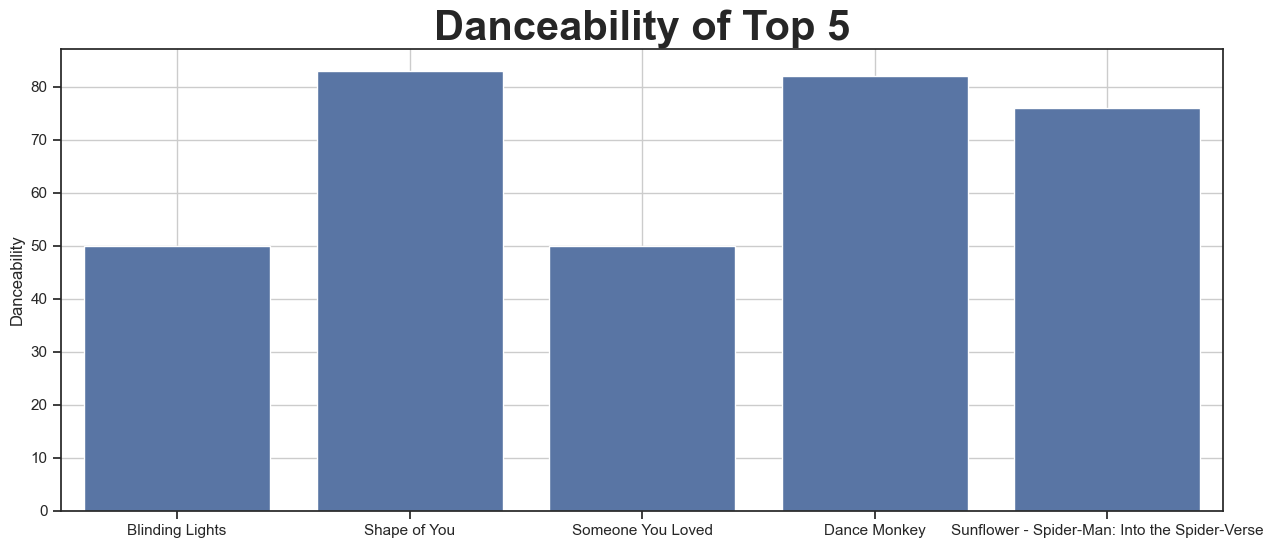

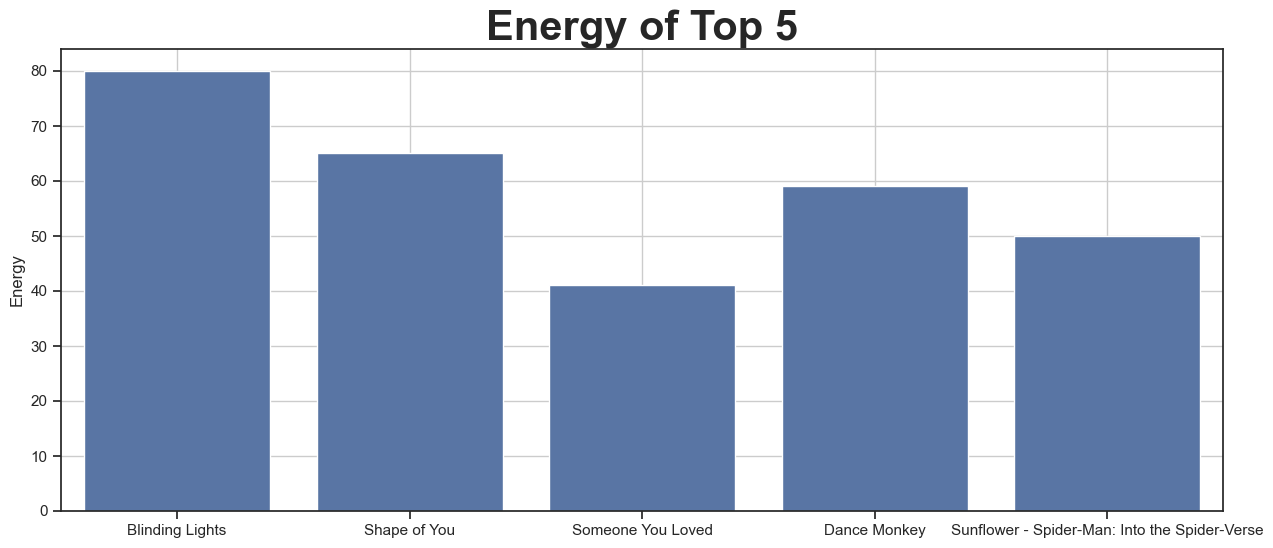

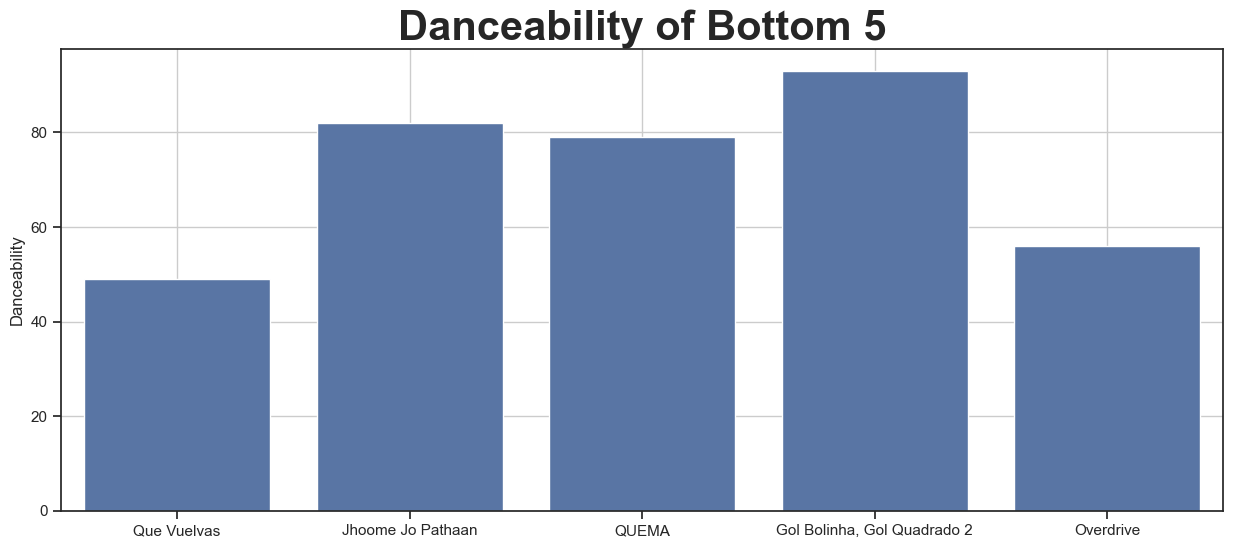

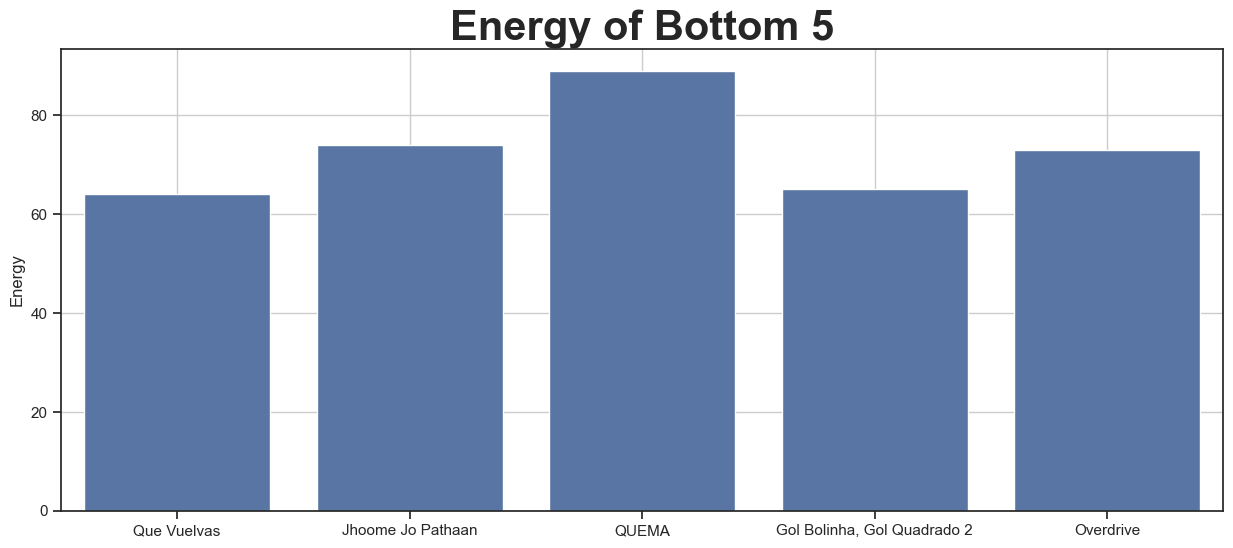

In [445]:
### Finding correlation of attributes, danceability and energy, using the top 5 and bottom 5 samples
barg(wok,'track_name','danceability_%','Danceability of Top 5','Danceability')
barg(wok,'track_name','energy_%','Energy of Top 5','Energy')
barg(kow,'track_name','danceability_%','Danceability of Bottom 5','Danceability')
barg(kow,'track_name','energy_%','Energy of Bottom 5','Energy')

#### Reiterating Valence and Acousticness Graphs for Easier Comparison:

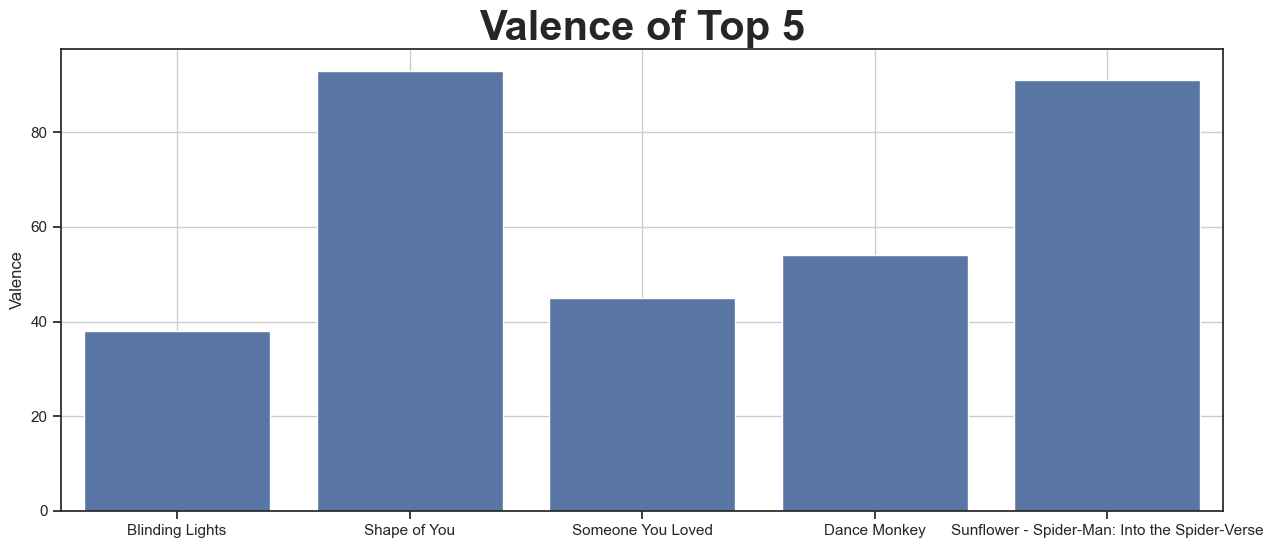

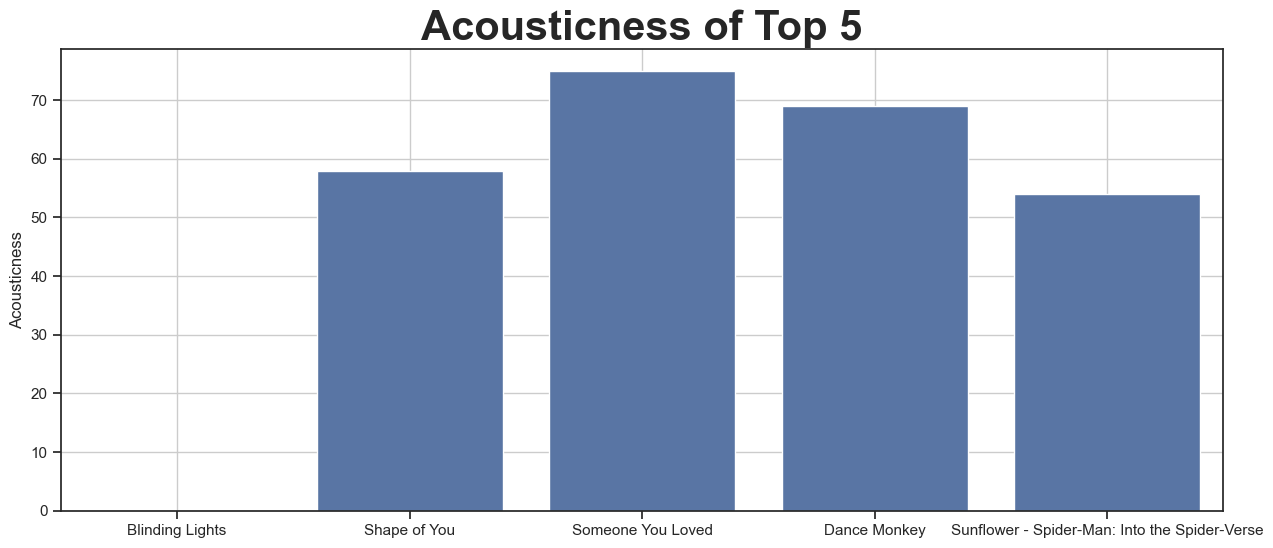

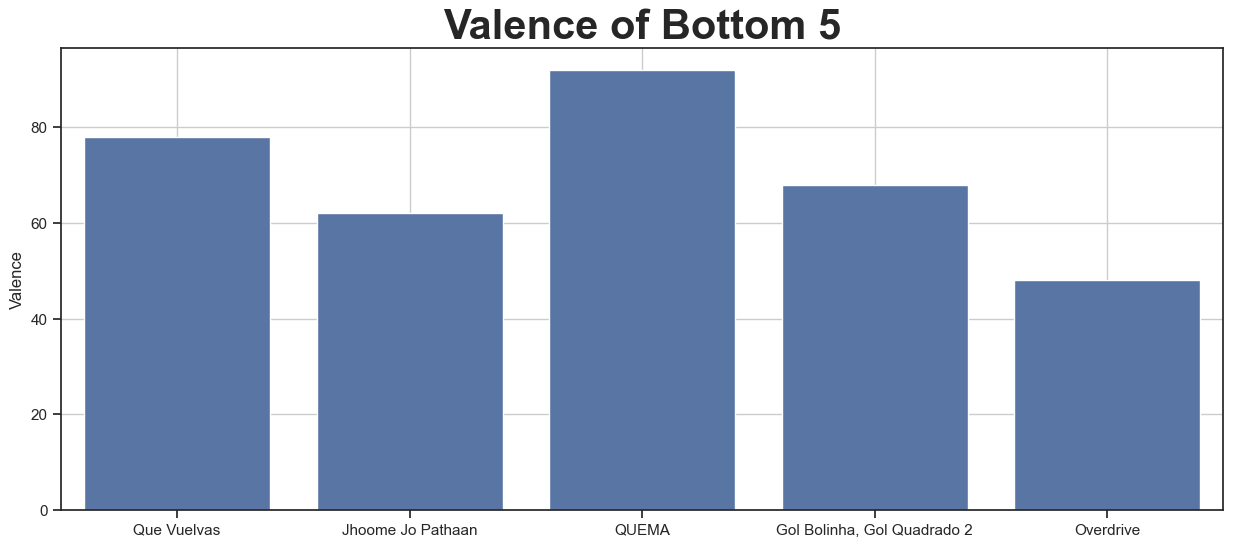

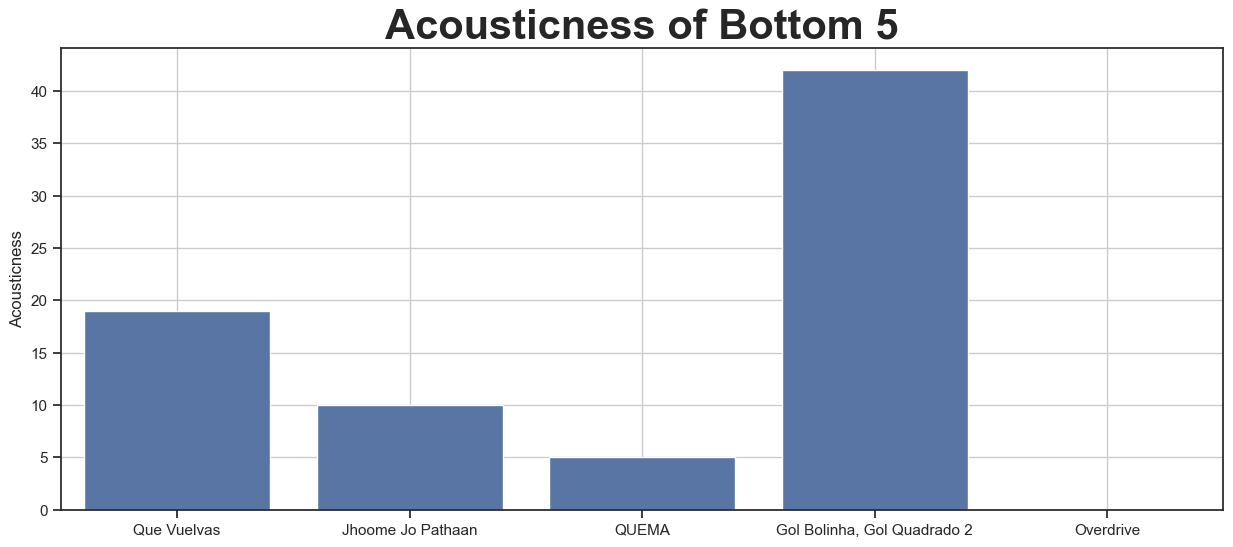

In [447]:
### Finding correlation of attributes, Valence and Acousticness, using the top 5 and bottom 5 samples
barg(wok,'track_name','valence_%','Valence of Top 5','Valence')
barg(wok,'track_name','acousticness_%','Acousticness of Top 5','Acousticness')
barg(kow,'track_name','valence_%','Valence of Bottom 5','Valence')
barg(kow,'track_name','acousticness_%','Acousticness of Bottom 5','Acousticness')

#### Getting the Platforms of the Top 5 and Bottom 5:

In [455]:
### Setting up data frames for playlist and chart comparisons for the top 5 and bottom 5 in streams
plat = topfive.loc[:,['track_name', 'streams','in_spotify_playlists','in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists' , 'in_deezer_charts', 'in_shazam_charts']]
form = botfive.loc[:,['track_name', 'streams','in_spotify_playlists','in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists' , 'in_deezer_charts', 'in_shazam_charts']]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(plat)
    display(form)

track_name       streams  \
55                                 Blinding Lights 3703895074.00   
179                                   Shape of You 3562543890.00   
86                               Someone You Loved 2887241814.00   
620                                   Dance Monkey 2864791672.00   
41   Sunflower - Spider-Man: Into the Spider-Verse 2808096550.00   

     in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
55                  43899                 69                 672   
179                 32181                 10                  33   
86                  17836                 53                 440   
620                 24529                  0                 533   
41                  24094                 78                 372   

     in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  
55               199                 3421                20               NaN  
179                0                 6808                 7              0.00  
86               125                 1800                 0               NaN  
620              167                 3595                 6               NaN  
41               117                  843                 4             69.00

track_name     streams  in_spotify_playlists  \
123                  Que Vuelvas     2762.00                   763   
393            Jhoome Jo Pathaan  1365184.00                   138   
144                        QUEMA 11599388.00                   437   
142  Gol Bolinha, Gol Quadrado 2 11956641.00                   293   
68                     Overdrive 14780425.00                   410   

     in_spotify_charts  in_apple_playlists  in_apple_charts  \
123                 26                  21              110   
393                  4                  13               78   
144                 31                  17               29   
142                  8                   5                2   
68                  36                  36               32   

     in_deezer_playlists  in_deezer_charts  in_shazam_charts  
123                   21                 9             71.00  
393                    2                 0              0.00  
144                   26                 3            208.00  
142                   30                 2             66.00  
68                    31                 1             26.00

### Getting the Mean for the Charts and Playlists:

In [457]:
### Getting the average of the top 5 and bottom 5 total playlist appearances and average position in charts
AvePlat = plat.mean(numeric_only=True)
df = pd.DataFrame(AvePlat, columns=['A']).reset_index()
df.columns =['Platform','Average']
df = df.drop(index=0)
display(df)

AveForm= form.mean(numeric_only=True)
fd = pd.DataFrame(AveForm, columns=['A']).reset_index()
fd.columns =['Platform','Average']
fd = fd.drop(index=0)
display(fd)

Platform  Average
1  in_spotify_playlists 28507.80
2     in_spotify_charts    42.00
3    in_apple_playlists   410.00
4       in_apple_charts   121.60
5   in_deezer_playlists  3293.40
6      in_deezer_charts     7.40
7      in_shazam_charts    34.50

Platform  Average
1  in_spotify_playlists   408.20
2     in_spotify_charts    21.00
3    in_apple_playlists    18.40
4       in_apple_charts    50.20
5   in_deezer_playlists    22.00
6      in_deezer_charts     3.00
7      in_shazam_charts    74.20

### Plotting the Means on a Bar Graph (w/ and w/o Spotify):

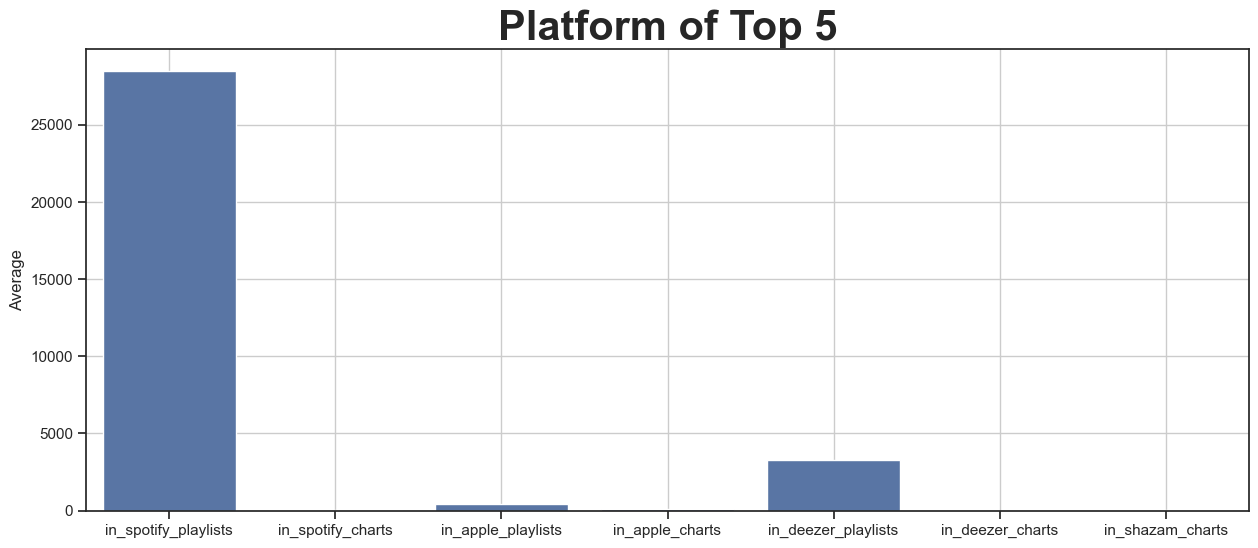

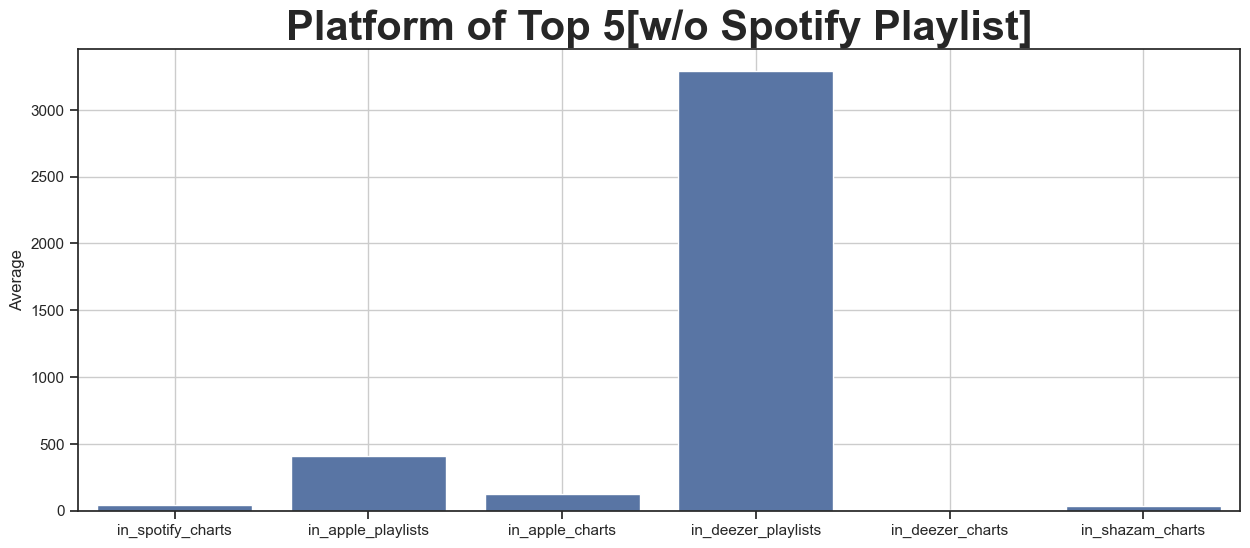

In [459]:
### Bar graph to better illustrate the averages, with spotify removed for the other bar graph since it has too large of a value
barg(df,'Platform','Average','Platform of Top 5','Average')
ab = df.drop(index=1)
barg(ab,'Platform','Average','Platform of Top 5[w/o Spotify Playlist]','Average')

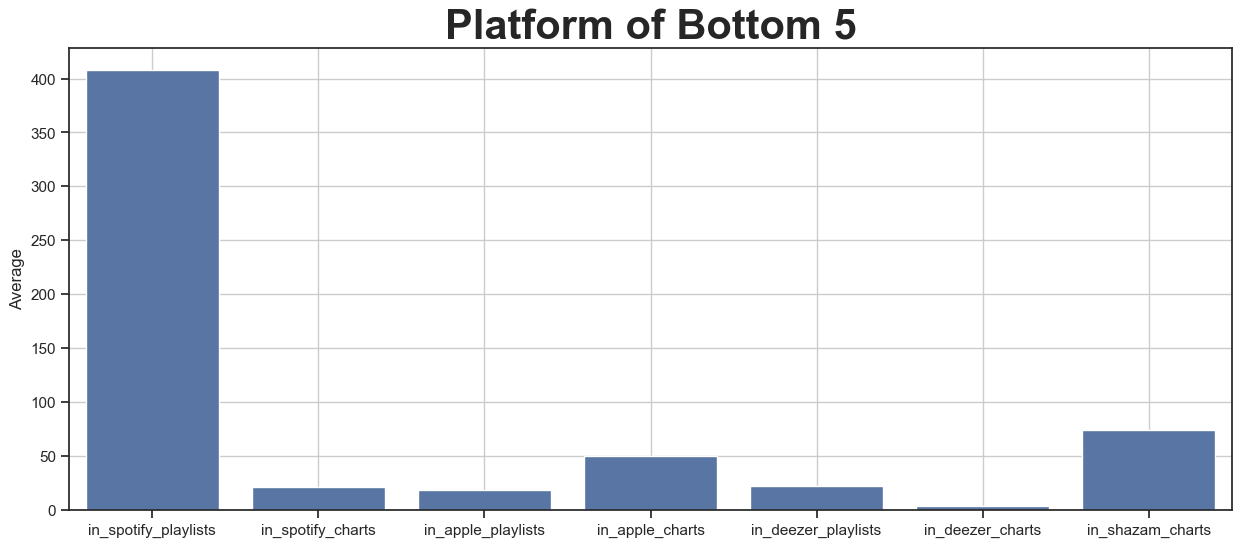

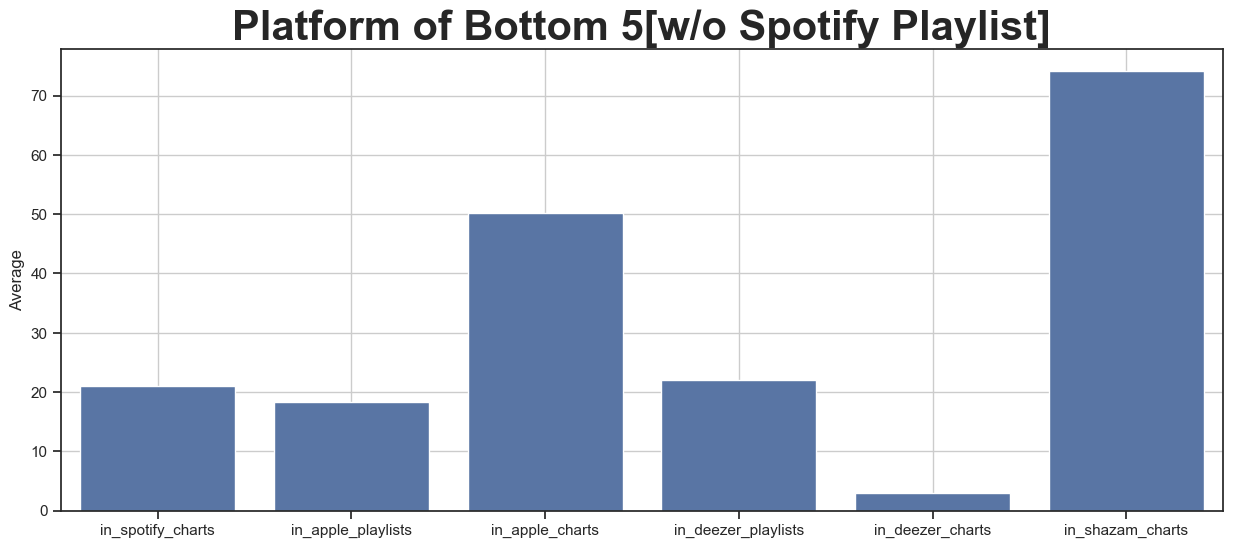

In [461]:
### Same bar graphs but this time for the bottom 5
barg(fd,'Platform','Average','Platform of Bottom 5','Average')
ba = fd.drop(index=1)
barg(ba,'Platform','Average','Platform of Bottom 5[w/o Spotify Playlist]','Average')

### Getting all Tracks in Major Mode for Observation:

In [463]:
### Getting tracks in major mode
majmode = a.loc[(a['mode']=='Major')]
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(majmode)

track_name  \
0                  Seven (feat. Latto) (Explicit Ver.)   
1                                                 LALA   
2                                              vampire   
3                                         Cruel Summer   
5                                             Sprinter   
7                                             Columbia   
12                                             Flowers   
15                                           Kill Bill   
17   What Was I Made For? [From The Motion Picture ...   
18                                          Classy 101   
19                                          Like Crazy   
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   
24   Popular (with Playboi Carti & Madonna) - The I...   
26                       Calm Down (with Selena Gomez)   
28                                          Last Night   
31                                               TULUM   
33                                           Anti-Hero   
35                                     Los del Espacio   
36                      Frï¿½ï¿½gil (feat. Grupo Front   
37                                         Blank Space   
38                                               Style   
41       Sunflower - Spider-Man: Into the Spider-Verse   
43                                       See You Again   
44    Barbie World (with Aqua) [From Barbie The Album]   
45                                     Angels Like You   
46                                     I Ain't Worried   
48                                             Starboy   
51                                  Baby Don't Hurt Me   
55                                     Blinding Lights   
60                                              Tï¿½ï¿   
61                                  Boy's a liar Pt. 2   
62             Left and Right (Feat. Jung Kook of BTS)   
65                                              Yellow   
66                                               Karma   
68                                           Overdrive   
69                        Enchanted (Taylor's Version)   
71                                          Heat Waves   
73                                     Sweater Weather   
74               Quevedo: Bzrp Music Sessions, Vol. 52   
76                                        Here With Me   
77                           Unholy (feat. Kim Petras)   
79                                     CORAZï¿½ï¿½N VA   
80                                             Riptide   
81   Until I Found You (with Em Beihold) - Em Beiho...   
82                                   Novidade na ï¿½ï¿   
83                 Back To December (Taylor's Version)   
84                           STAY (with Justin Bieber)   
86                                   Someone You Loved   
88                                              Makeba   
89                                  MONTAGEM - FR PUNK   
90                                            Fast Car   
92                                         Coco Chanel   
95                         All My Life (feat. J. Cole)   
97                                              Snooze   
99                                            Take Two   
100                                              Lover   
102                                           Chemical   
105                                       Primera Cita   
106                            Cold Heart - PNAU Remix   
107                                         Dandelions   
111                                  Tak Segampang Itu   
112                                            LAGUNAS   
113                            Mine (Taylor's Version)   
114                  Everybody Wants To Rule The World   
119                                             august   
121                      Miracle (with Ellie Goulding)   
122                                           Nonsense   
123                                        Que Vuelvas   
124                                     Po

#### Plotting the Distribution of Values Across Various Attributes of Both Major and Minor Modes:

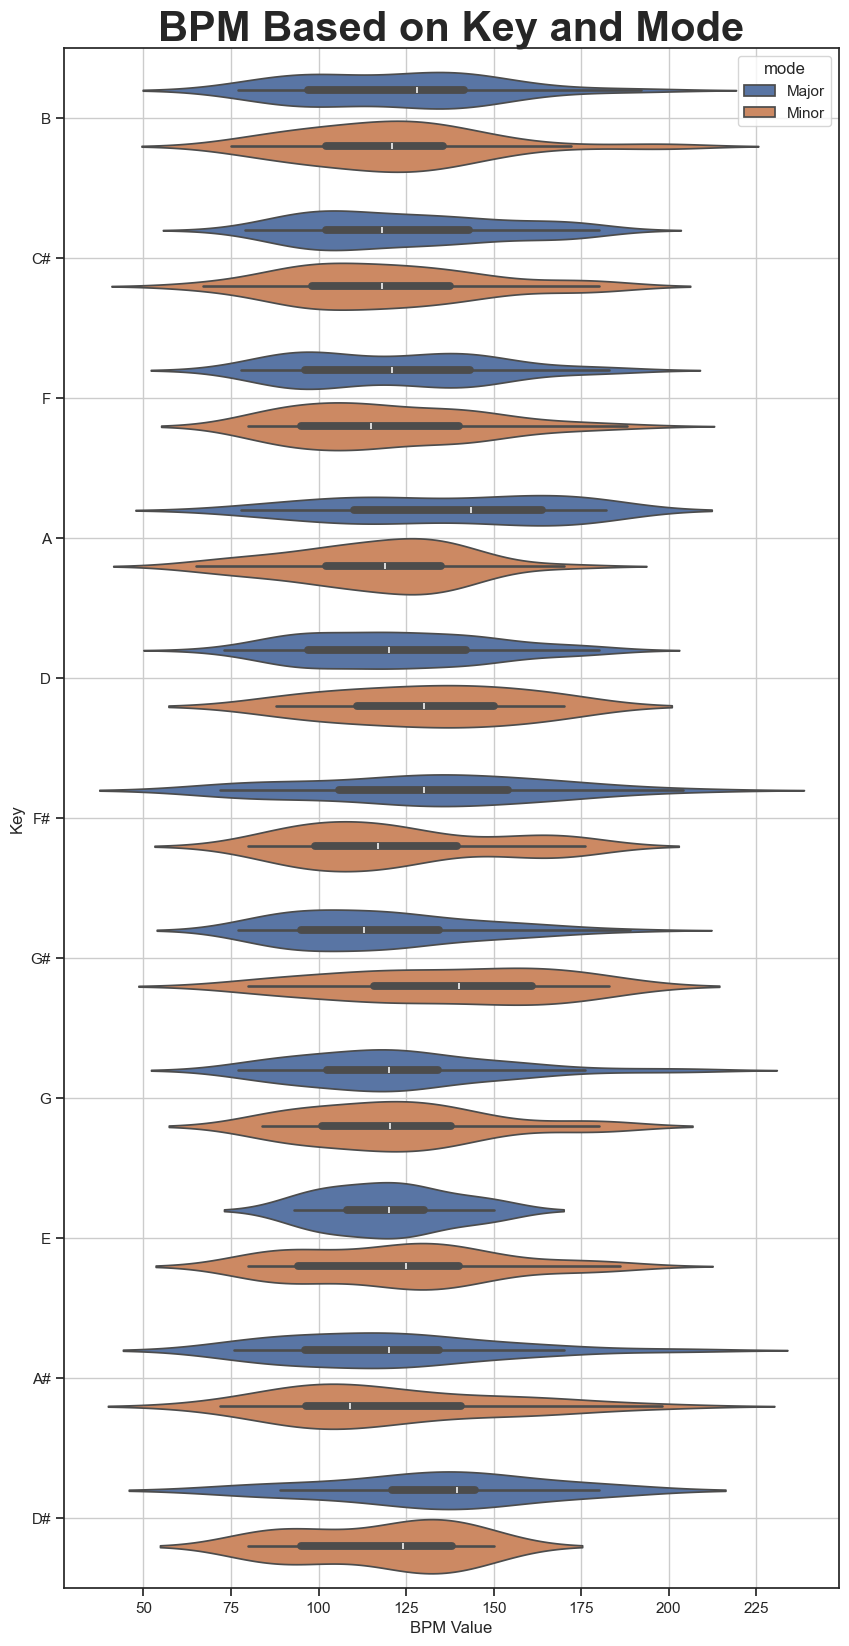

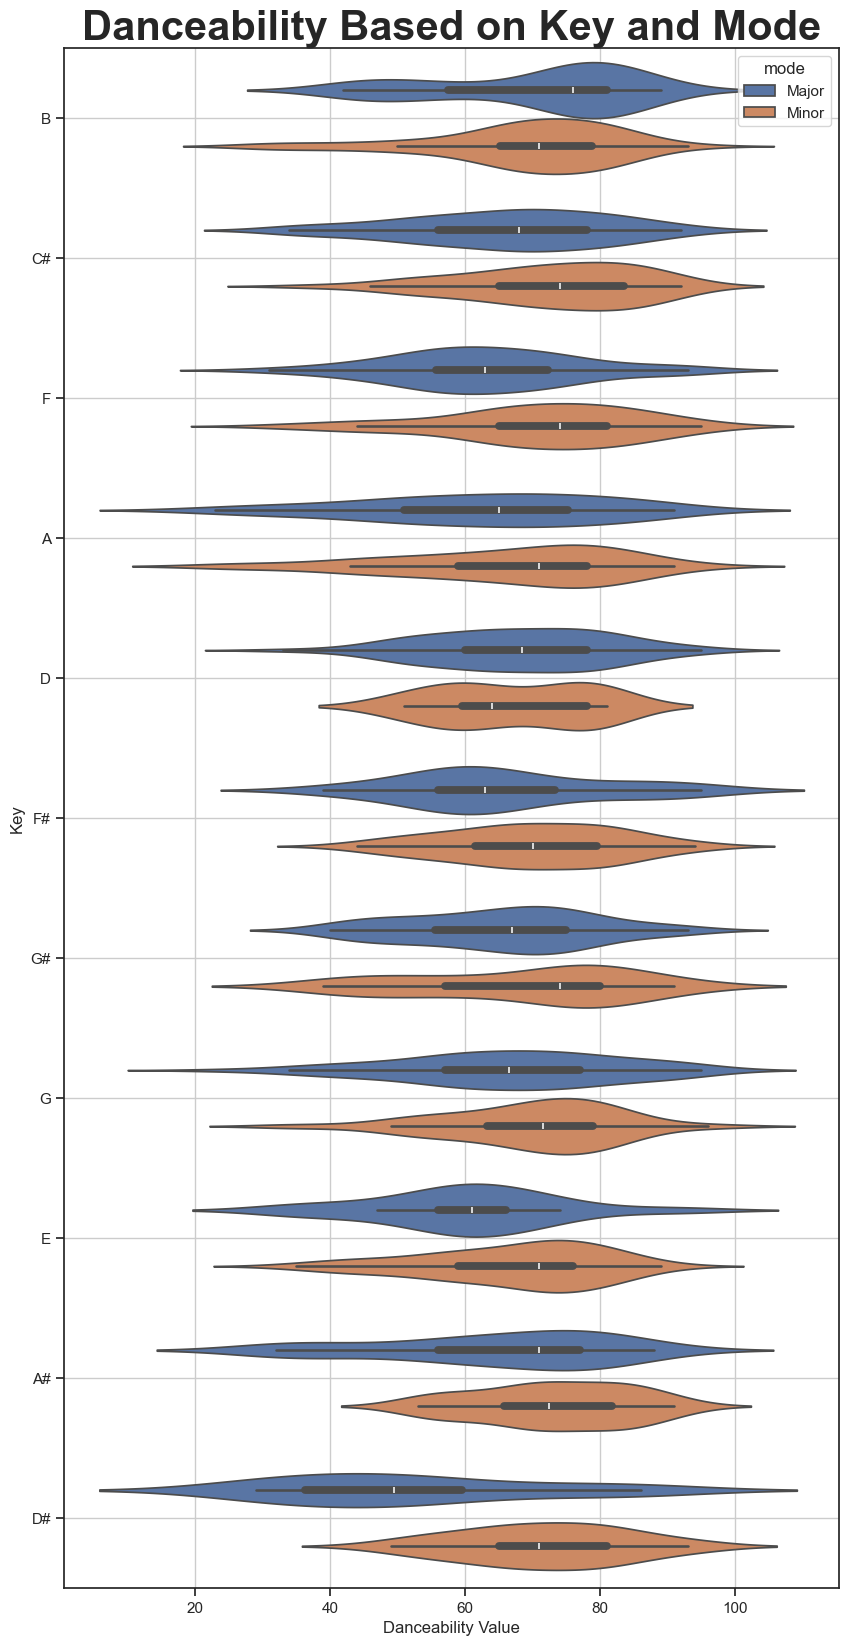

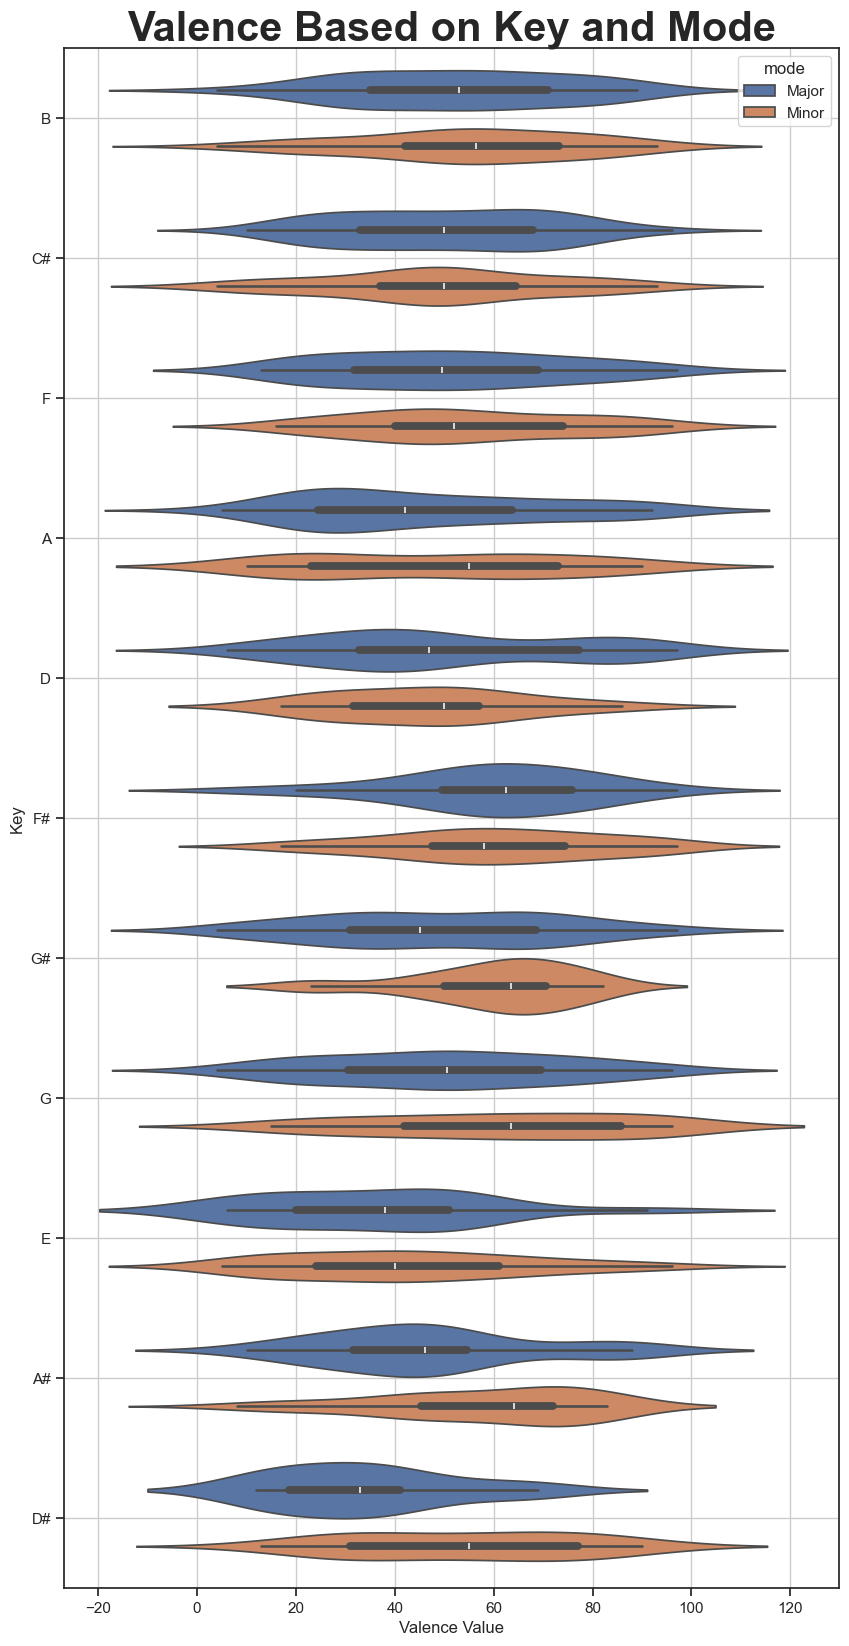

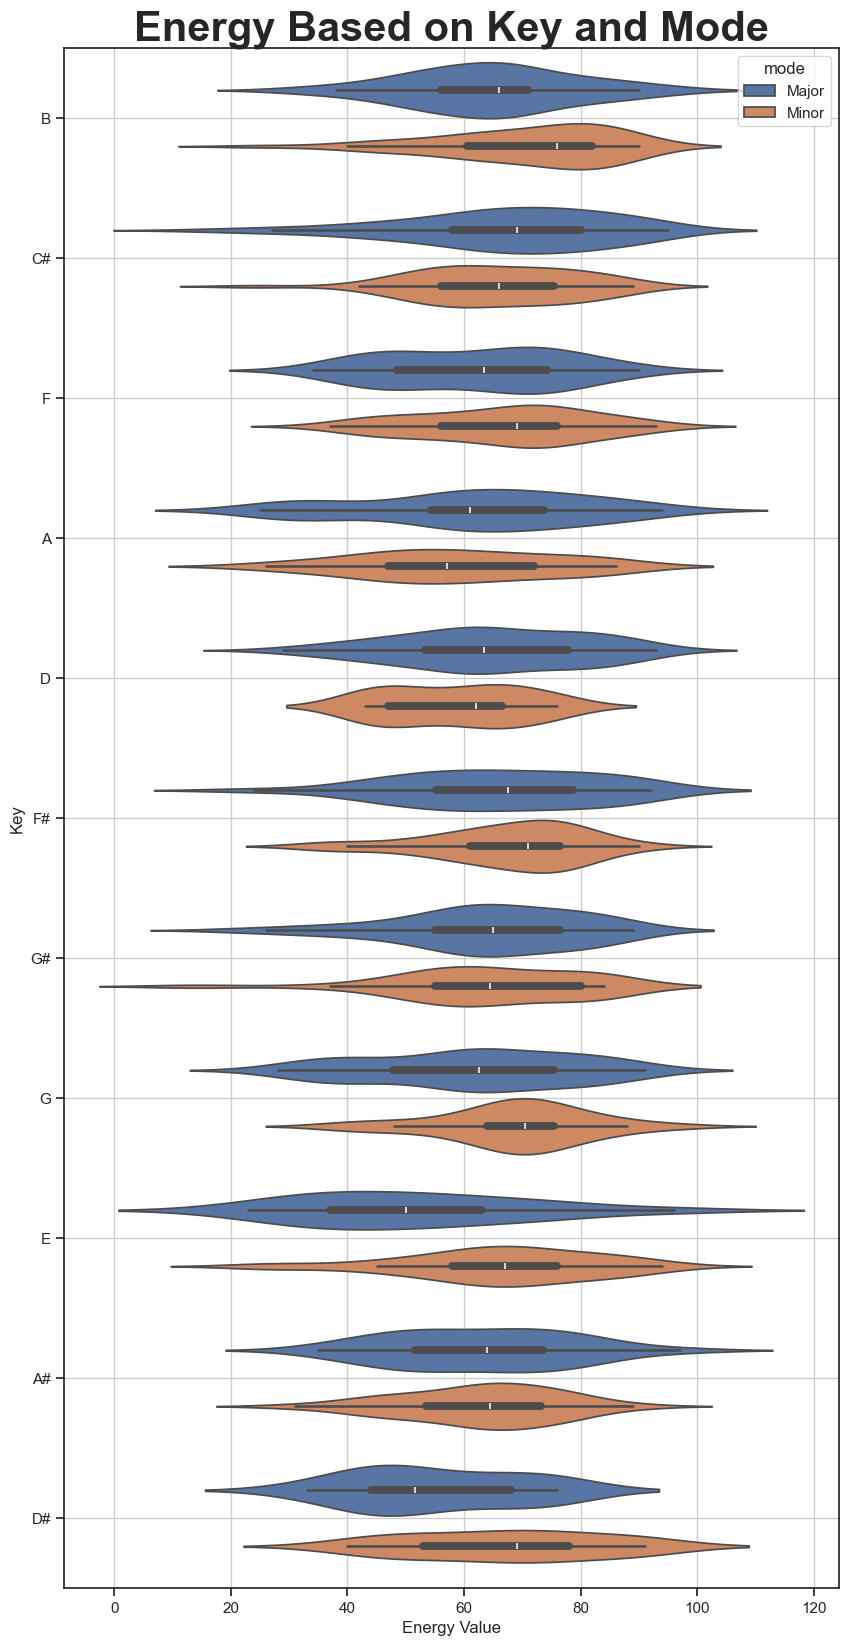

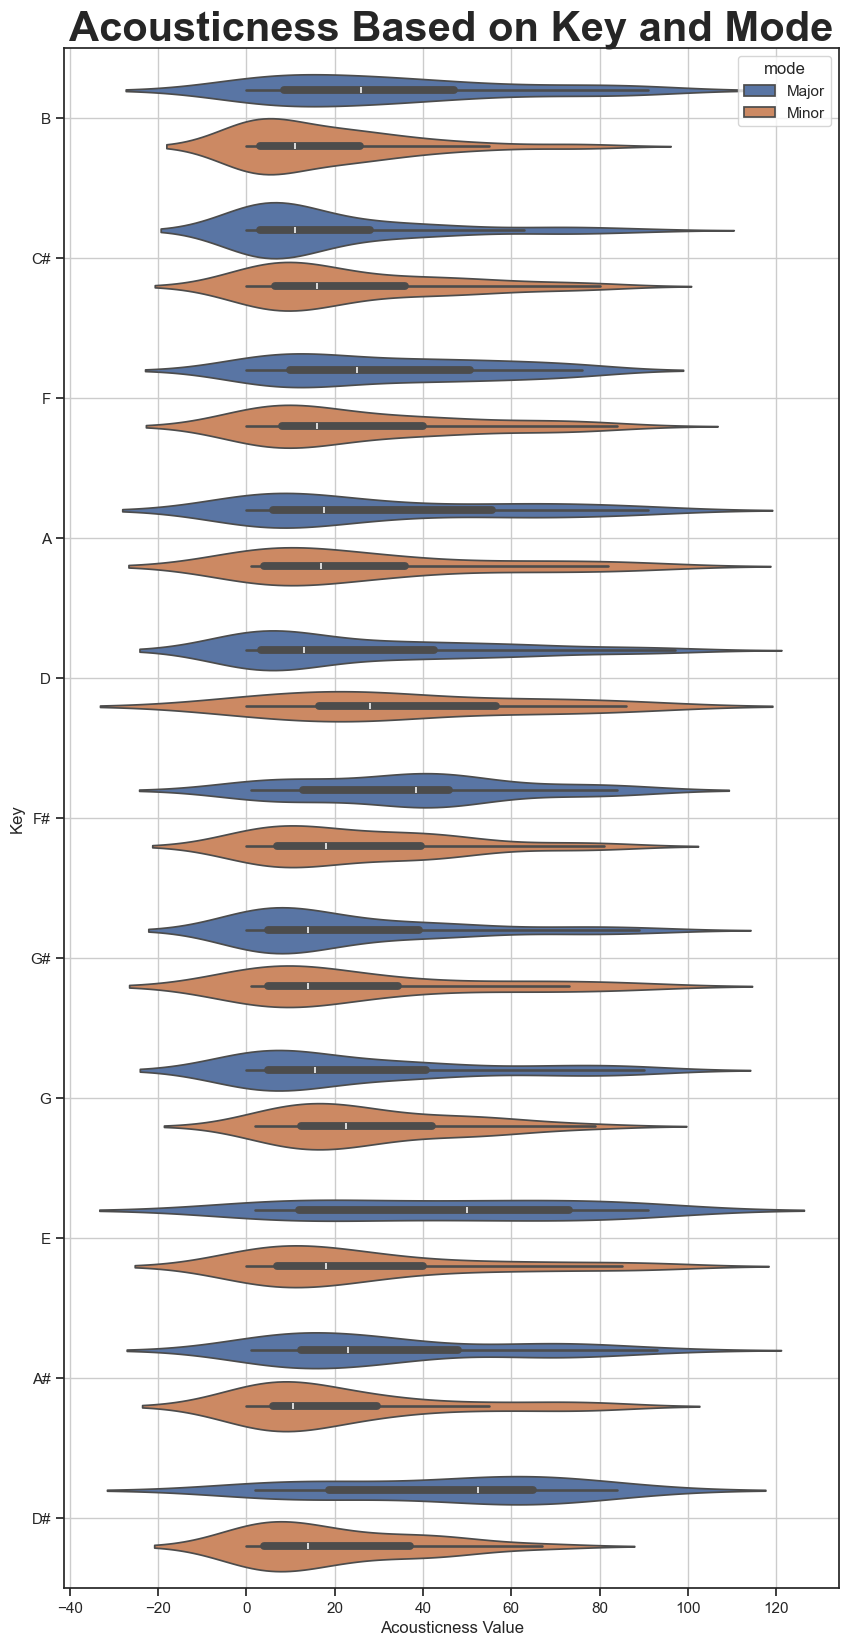

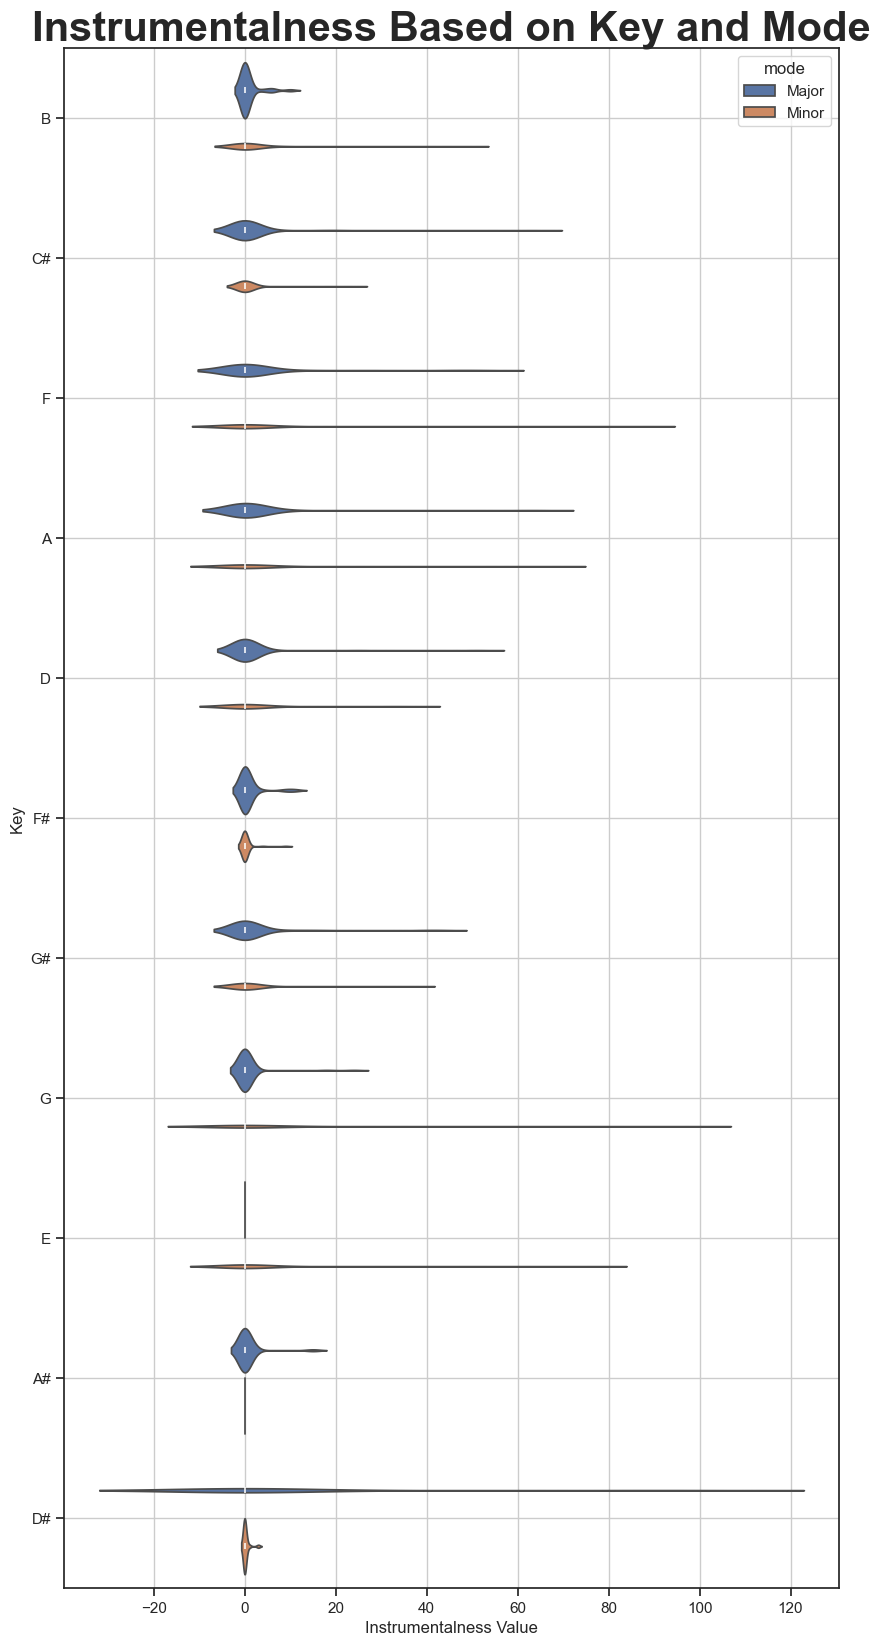

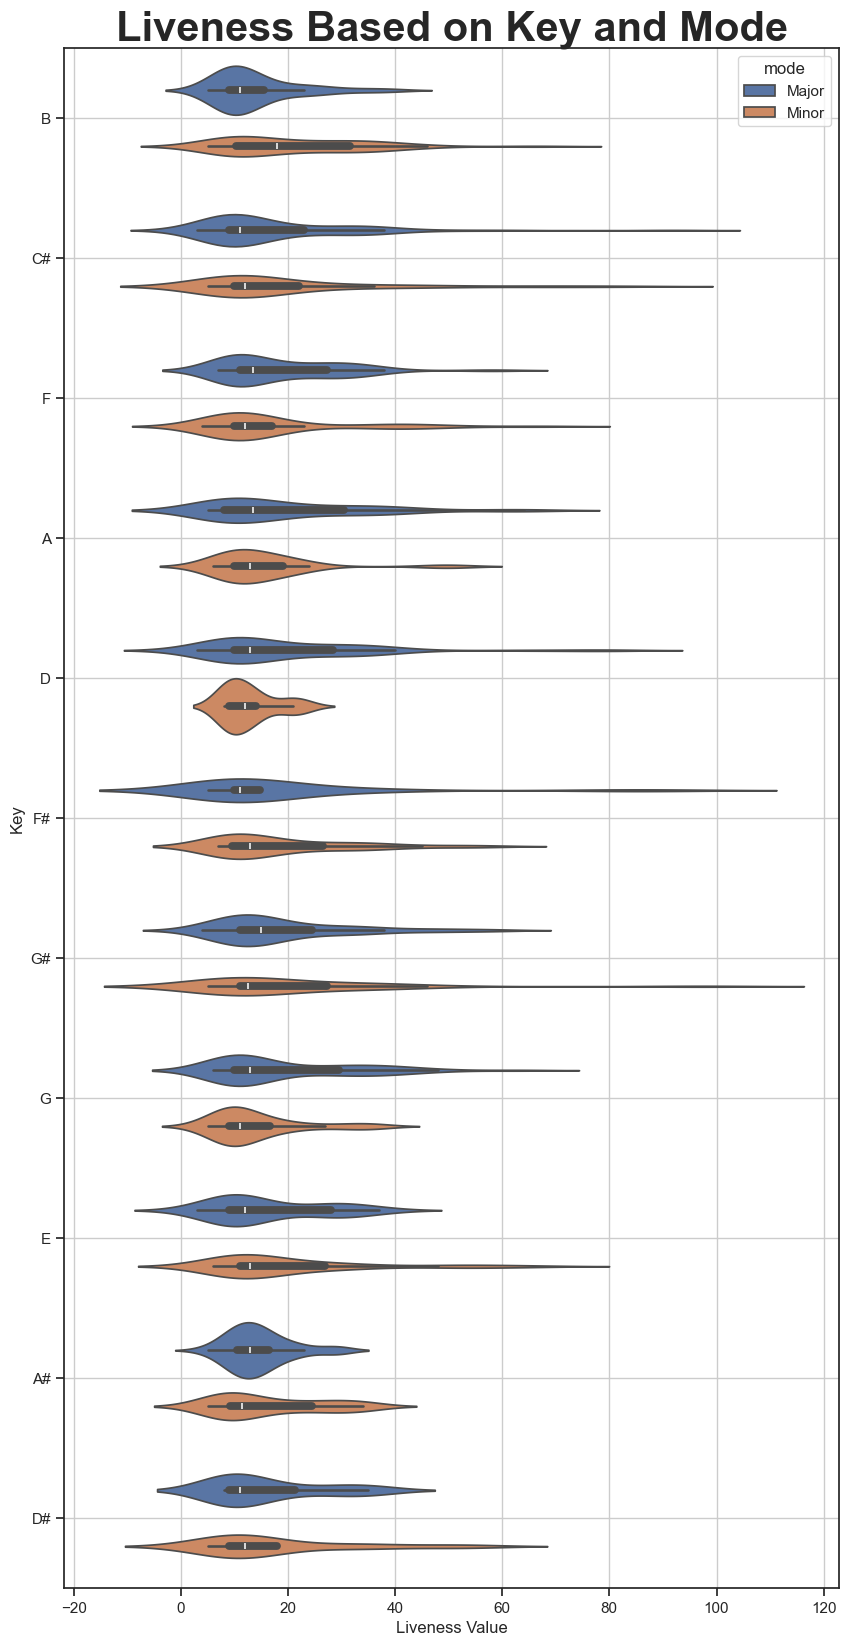

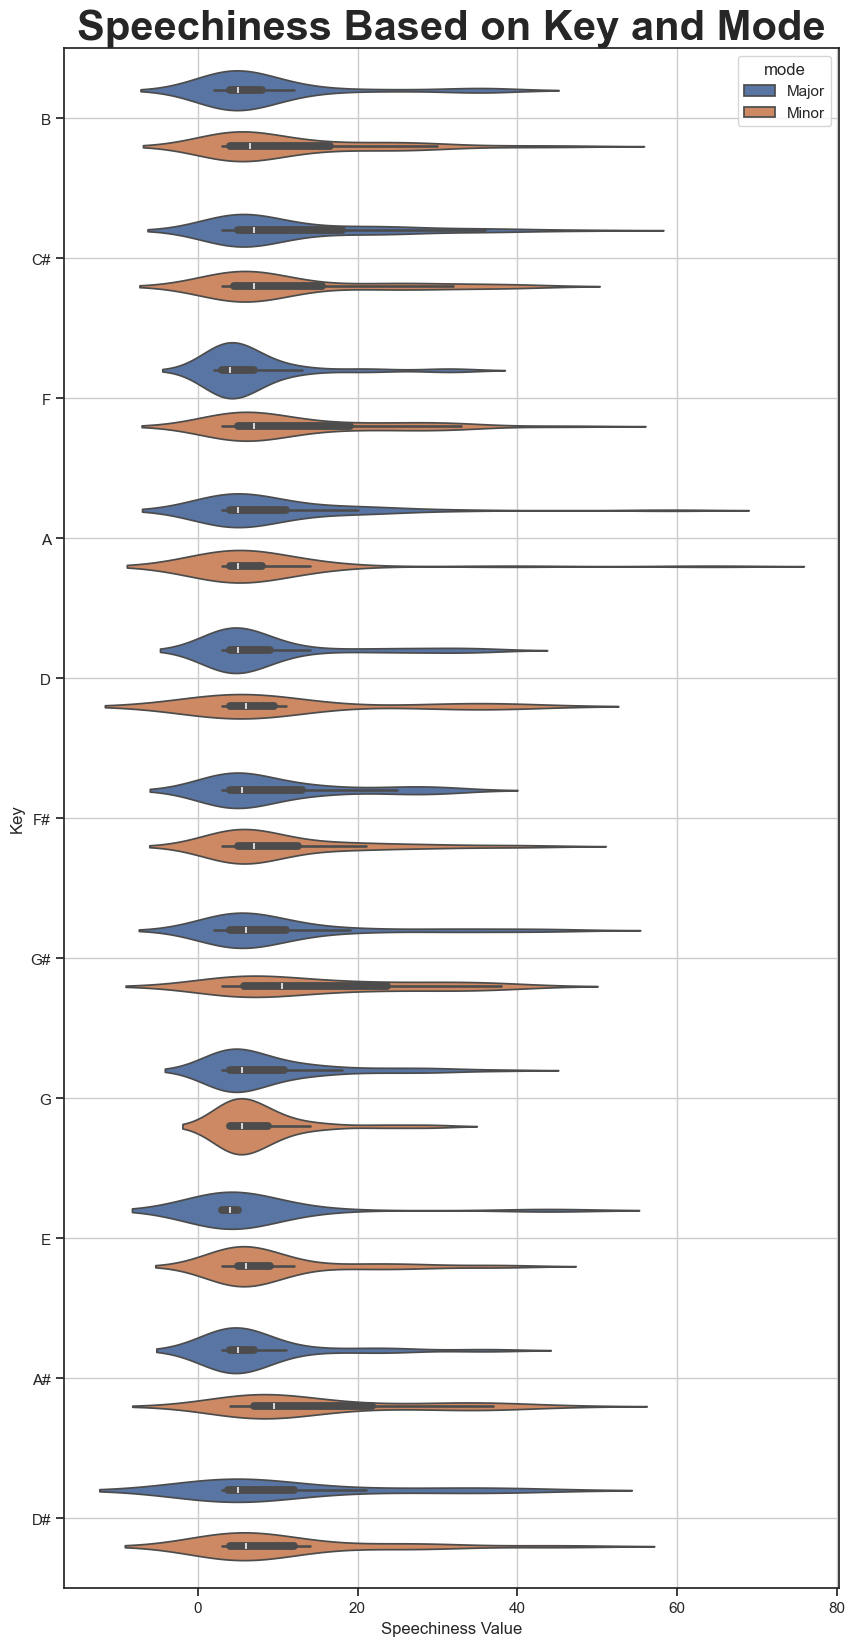

In [467]:
### Violin plots to help visualize distribution across various attributes
bayolin('bpm', 'BPM Based on Key and Mode', 'BPM Value')
bayolin('danceability_%','Danceability Based on Key and Mode', 'Danceability Value')
bayolin('valence_%','Valence Based on Key and Mode', 'Valence Value')
bayolin('energy_%','Energy Based on Key and Mode', 'Energy Value')
bayolin('acousticness_%','Acousticness Based on Key and Mode', 'Acousticness Value')
bayolin('instrumentalness_%','Instrumentalness Based on Key and Mode', 'Instrumentalness Value')
bayolin('liveness_%','Liveness Based on Key and Mode', 'Liveness Value')
bayolin('speechiness_%','Speechiness Based on Key and Mode', 'Speechiness Value')

### Finding the Highest Number in a Respective Playlist:

In [473]:
### Finding the most frequently appearing in specific playlist
larg('in_spotify_playlists')
larg('in_apple_playlists')
larg('in_deezer_playlists')

track_name                              artist(s)_name  \
757  Get Lucky - Radio Edit  Pharrell Williams, Nile Rodgers, Daft Punk   

     artist_count  released_year  released_month  released_day  \
757             3           2013               1             1   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
757                 52898                  0 933815613.00                 203   

     in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  \
757                1                 8215                 0              0.00   

     bpm key   mode  danceability_%  valence_%  energy_%  acousticness_%  \
757  116  F#  Minor              79         87        81               4   

     instrumentalness_%  liveness_%  speechiness_%  
757                   0          10              4

track_name artist(s)_name  artist_count  released_year  \
55  Blinding Lights     The Weeknd             1           2019   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
55              11            29                 43899                 69   

         streams  in_apple_playlists  in_apple_charts  in_deezer_playlists  \
55 3703895074.00                 672              199                 3421   

    in_deezer_charts  in_shazam_charts  bpm key   mode  danceability_%  \
55                20               NaN  171  C#  Major              50   

    valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
55         38        80               0                   0           9   

    speechiness_%  
55              7

track_name artist(s)_name  artist_count  \
624  Smells Like Teen Spirit - Remastered 2021        Nirvana             1   

     released_year  released_month  released_day  in_spotify_playlists  \
624           1991               9            10                 49991   

     in_spotify_charts       streams  in_apple_playlists  in_apple_charts  \
624                  9 1690192927.00                 265              121   

     in_deezer_playlists  in_deezer_charts  in_shazam_charts  bpm key   mode  \
624                12367                 4            160.00  117  C#  Major   

     danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
624              52         73        91               0                   0   

     liveness_%  speechiness_%  
624          11              7

#### Concatenating the Three Data Frames to be Used for Plotting:

In [475]:
### Convert Findings to data frames for plotting
spot = a.loc[a['track_name']=='Get Lucky - Radio Edit']
app = a.loc[a['track_name']=='Blinding Lights']
deez = a.loc[a['track_name']=='Smells Like Teen Spirit - Remastered 2021']
playlistt = pd.concat([spot, app, deez], ignore_index=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(playlistt)

track_name  \
0                     Get Lucky - Radio Edit   
1                            Blinding Lights   
2  Smells Like Teen Spirit - Remastered 2021   

                               artist(s)_name  artist_count  released_year  \
0  Pharrell Williams, Nile Rodgers, Daft Punk             3           2013   
1                                  The Weeknd             1           2019   
2                                     Nirvana             1           1991   

   released_month  released_day  in_spotify_playlists  in_spotify_charts  \
0               1             1                 52898                  0   
1              11            29                 43899                 69   
2               9            10                 49991                  9   

        streams  in_apple_playlists  in_apple_charts  in_deezer_playlists  \
0  933815613.00                 203                1                 8215   
1 3703895074.00                 672              199                 3421   
2 1690192927.00                 265              121                12367   

   in_deezer_charts  in_shazam_charts  bpm key   mode  danceability_%  \
0                 0              0.00  116  F#  Minor              79   
1                20               NaN  171  C#  Major              50   
2                 4            160.00  117  C#  Major              52   

   valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0         87        81               4                   0          10   
1         38        80               0                   0           9   
2         73        91               0                   0          11   

   speechiness_%  
0              4  
1              7  
2              7

#### Comparing the Attributes of the Top in Their Respective Platforms:

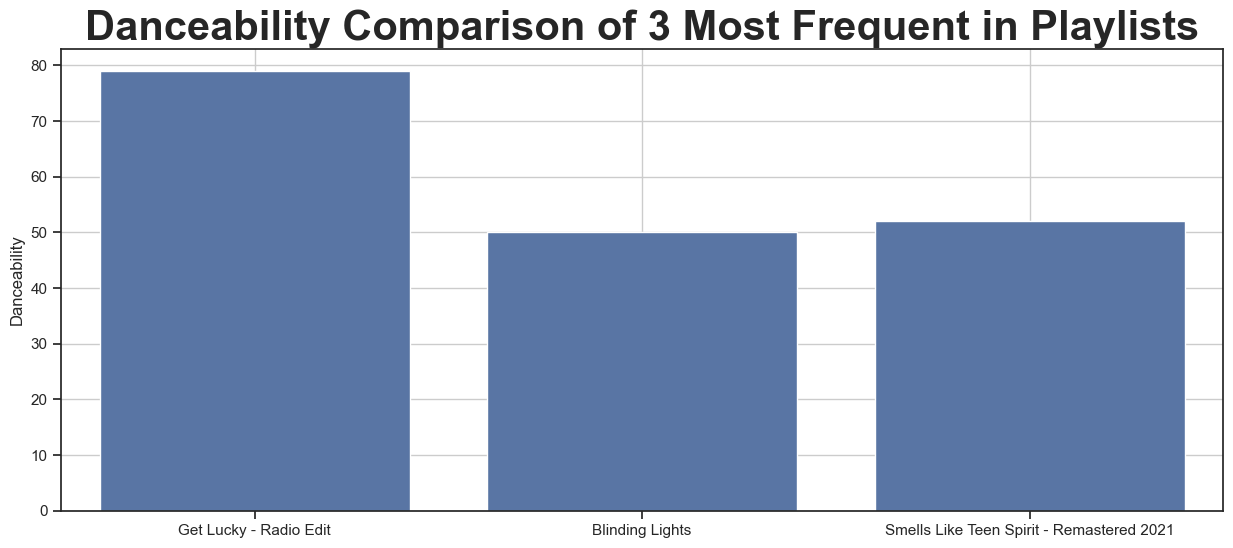

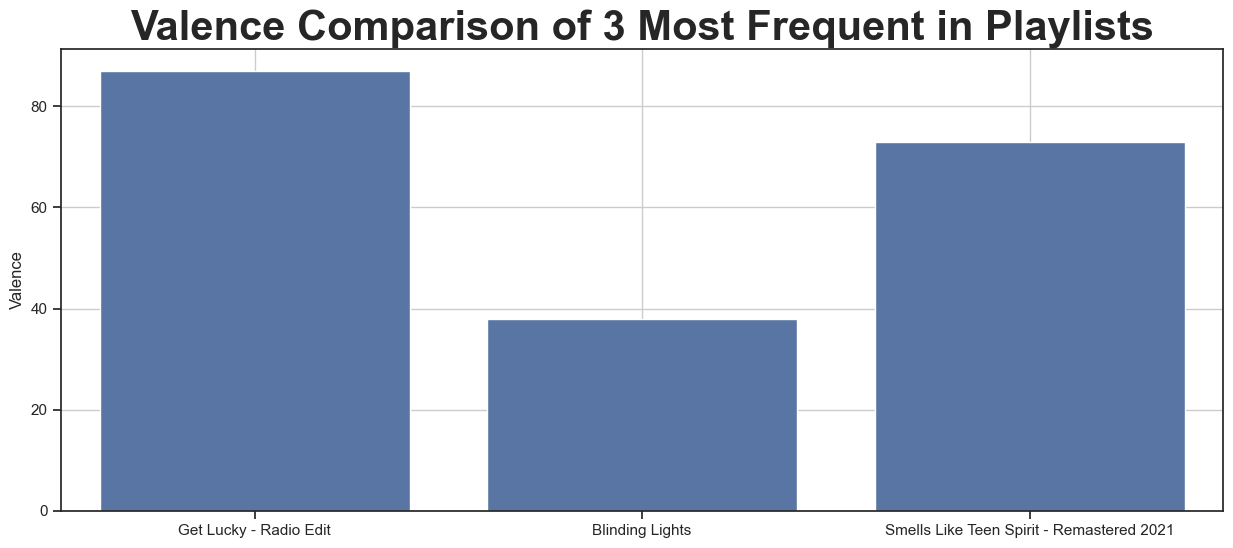

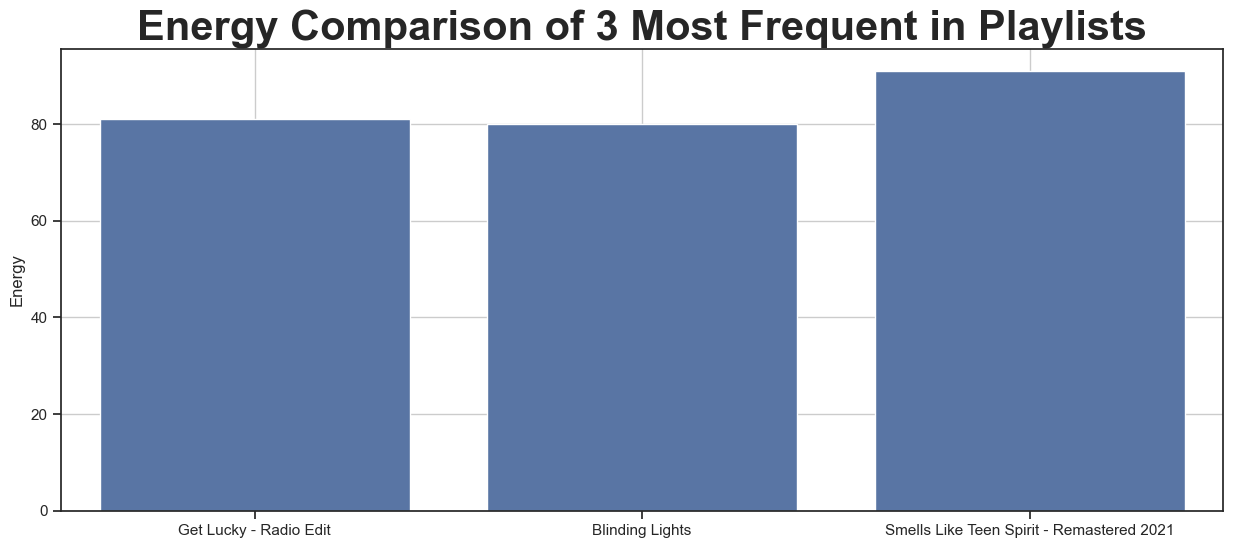

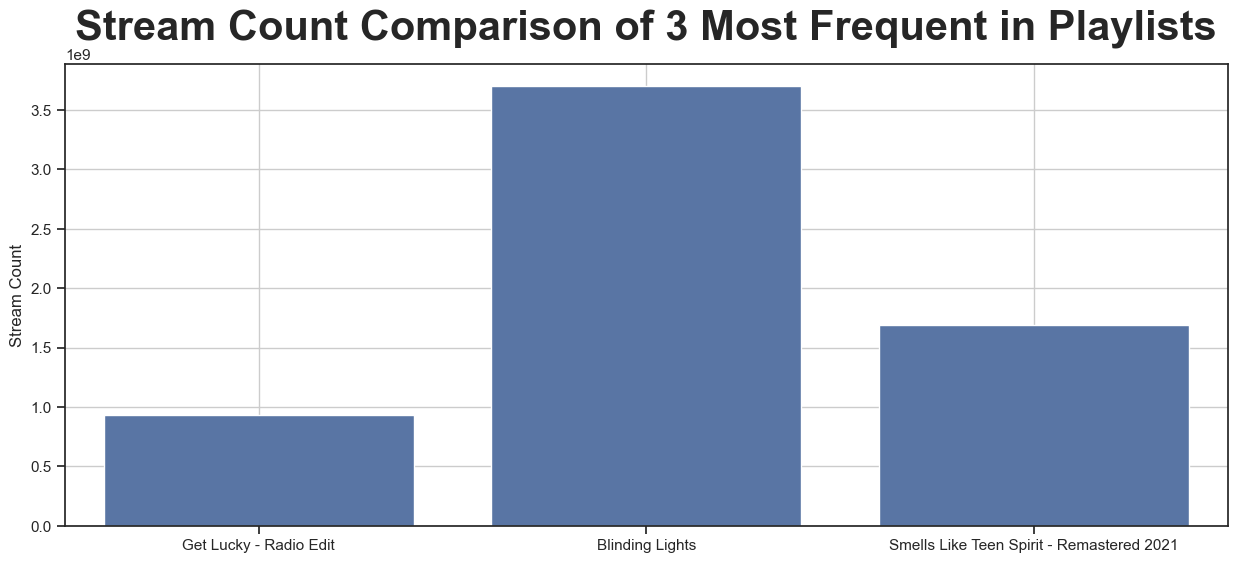

In [574]:
### Comparison of the 3 tracks using bar graph
barg(playlistt, 'track_name', 'danceability_%', 'Danceability Comparison of 3 Most Frequent in Playlists', 'Danceability')
barg(playlistt, 'track_name', 'valence_%', 'Valence Comparison of 3 Most Frequent in Playlists', 'Valence')
barg(playlistt, 'track_name', 'energy_%', 'Energy Comparison of 3 Most Frequent in Playlists', 'Energy')
barg(playlistt, 'track_name','streams','Stream Count Comparison of 3 Most Frequent in Playlists', 'Stream Count')

#### Making a Copy of the Main Data Frame for Manipulation:

In [479]:
### Making a separate variable for the overall data frame to be used for finding the most frequent artists
ey = a
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ey)

track_name  \
0                  Seven (feat. Latto) (Explicit Ver.)   
1                                                 LALA   
2                                              vampire   
3                                         Cruel Summer   
4                                       WHERE SHE GOES   
5                                             Sprinter   
6                                      Ella Baila Sola   
7                                             Columbia   
8                                             fukumean   
9                                      La Bebe - Remix   
10                                           un x100to   
11                                           Super Shy   
12                                             Flowers   
13                                            Daylight   
14                                           As It Was   
15                                           Kill Bill   
16                                   Cupid - Twin Ver.   
17   What Was I Made For? [From The Motion Picture ...   
18                                          Classy 101   
19                                          Like Crazy   
20                                           LADY GAGA   
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   
22                                    I Wanna Be Yours   
23            Peso Pluma: Bzrp Music Sessions, Vol. 55   
24   Popular (with Playboi Carti & Madonna) - The I...   
25                                         SABOR FRESA   
26                       Calm Down (with Selena Gomez)   
27                                        MOJABI GHOST   
28                                          Last Night   
29             Dance The Night (From Barbie The Album)   
30                                                Rush   
31                                               TULUM   
32                                            Creepin'   
33                                           Anti-Hero   
34                                                 TQG   
35                                     Los del Espacio   
36                      Frï¿½ï¿½gil (feat. Grupo Front   
37                                         Blank Space   
38                                               Style   
39                                                 TQM   
40                                             El Azul   
41       Sunflower - Spider-Man: Into the Spider-Verse   
42                                     I'm Good (Blue)   
43                                       See You Again   
44    Barbie World (with Aqua) [From Barbie The Album]   
45                                     Angels Like You   
46                                     I Ain't Worried   
47                                         Die For You   
48                                             Starboy   
49                                 Die For You - Remix   
50                                            El Cielo   
51                                  Baby Don't Hurt Me   
52                                            AMARGURA   
53                        (It Goes Like) Nanana - Edit   
54                                        Another Love   
55                                     Blinding Lights   
56                                           Moonlight   
57                                          La Bachata   
58                                                 S91   
59                                            cardigan   
60                                              Tï¿½ï¿   
61                                  Boy's a liar Pt. 2   
62             Left and Right (Feat. Jung Kook of BTS)   
63                                                BESO   
64                                             Hey Mor   
65                                              Yellow   
66                                               Karma   
67                                              People   
68                                        

#### Display the Converted Data Frame:

In [485]:
### then display dataframe to check if it works
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ey)

track_name  \
0                  Seven (feat. Latto) (Explicit Ver.)   
1                                                 LALA   
2                                              vampire   
3                                         Cruel Summer   
4                                       WHERE SHE GOES   
5                                             Sprinter   
6                                      Ella Baila Sola   
7                                             Columbia   
8                                             fukumean   
9                                      La Bebe - Remix   
10                                           un x100to   
11                                           Super Shy   
12                                             Flowers   
13                                            Daylight   
14                                           As It Was   
15                                           Kill Bill   
16                                   Cupid - Twin Ver.   
17   What Was I Made For? [From The Motion Picture ...   
18                                          Classy 101   
19                                          Like Crazy   
20                                           LADY GAGA   
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   
22                                    I Wanna Be Yours   
23            Peso Pluma: Bzrp Music Sessions, Vol. 55   
24   Popular (with Playboi Carti & Madonna) - The I...   
25                                         SABOR FRESA   
26                       Calm Down (with Selena Gomez)   
27                                        MOJABI GHOST   
28                                          Last Night   
29             Dance The Night (From Barbie The Album)   
30                                                Rush   
31                                               TULUM   
32                                            Creepin'   
33                                           Anti-Hero   
34                                                 TQG   
35                                     Los del Espacio   
36                      Frï¿½ï¿½gil (feat. Grupo Front   
37                                         Blank Space   
38                                               Style   
39                                                 TQM   
40                                             El Azul   
41       Sunflower - Spider-Man: Into the Spider-Verse   
42                                     I'm Good (Blue)   
43                                       See You Again   
44    Barbie World (with Aqua) [From Barbie The Album]   
45                                     Angels Like You   
46                                     I Ain't Worried   
47                                         Die For You   
48                                             Starboy   
49                                 Die For You - Remix   
50                                            El Cielo   
51                                  Baby Don't Hurt Me   
52                                            AMARGURA   
53                        (It Goes Like) Nanana - Edit   
54                                        Another Love   
55                                     Blinding Lights   
56                                           Moonlight   
57                                          La Bachata   
58                                                 S91   
59                                            cardigan   
60                                              Tï¿½ï¿   
61                                  Boy's a liar Pt. 2   
62             Left and Right (Feat. Jung Kook of BTS)   
63                                                BESO   
64                                             Hey Mor   
65                                              Yellow   
66                                               Karma   
67                                              People   
68                                        

#### Finding the Most Frequently Appearing Artist in Their Respective Charts:

In [487]:
### Finding the name of the most frequently appearing artist in all charts
spotchart = ey['in_spotify_charts'].value_counts()
spotchart = spotchart.drop(0, errors='ignore')
spotcharttop = spotchart.idxmax()

appchart = ey['in_apple_charts'].value_counts()
appchart = appchart.drop(0, errors='ignore')
appcharttop = appchart.idxmax()

deezchart = ey['in_deezer_charts'].value_counts()
deezchart = deezchart.drop(0, errors='ignore')
deezcharttop = deezchart.idxmax()

shachart = ey['in_shazam_charts'].value_counts()
shachart = shachart.drop(0, errors='ignore')
shacharttop = shachart.idxmax()

print(spotcharttop)
print(appcharttop)
print(deezcharttop)
print(shacharttop)

Taylor Swift
Taylor Swift
Taylor Swift
Taylor Swift


#### Finding the Top 5 Most Frequent Artists to be Graphed:

In [489]:
### Finding the top 5 and graphing them, including the top 1, to better visualize how far ahead the top 1 is
spotchartdf = spotchart.reset_index()
spotchartdf.columns = ['Name', 'Frequency']
spotchartdf = spotchartdf.head(5)

appchartdf = appchart.reset_index()
appchartdf.columns = ['Name', 'Frequency']
appchartdf = appchartdf.head(5)

deezchartdf = deezchart.reset_index()
deezchartdf.columns = ['Name', 'Frequency']
deezchartdf = deezchartdf.head(5)

shachartdf = shachart.reset_index()
shachartdf.columns = ['Name', 'Frequency']
shachartdf = shachartdf.head(5)

#### Graphing the Artists Most Frequently Appearing in Their Respective Charts:

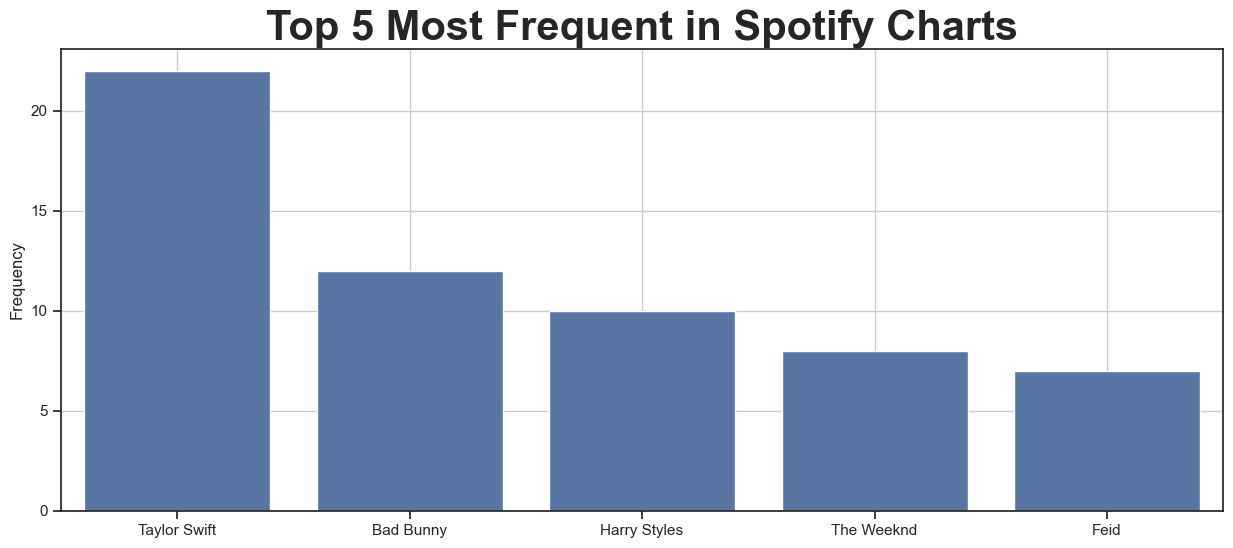

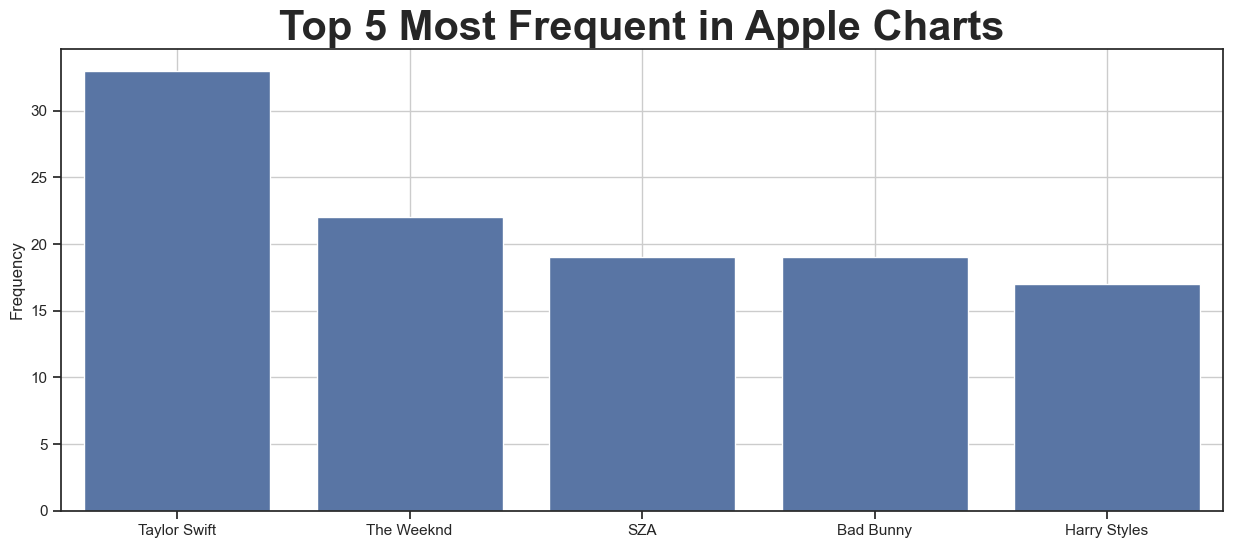

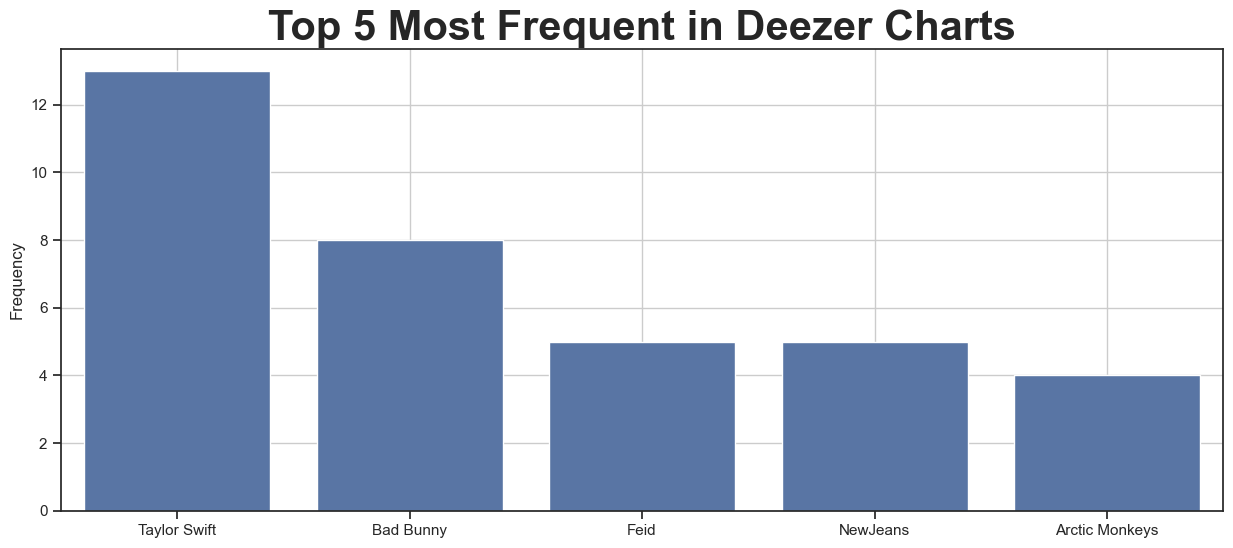

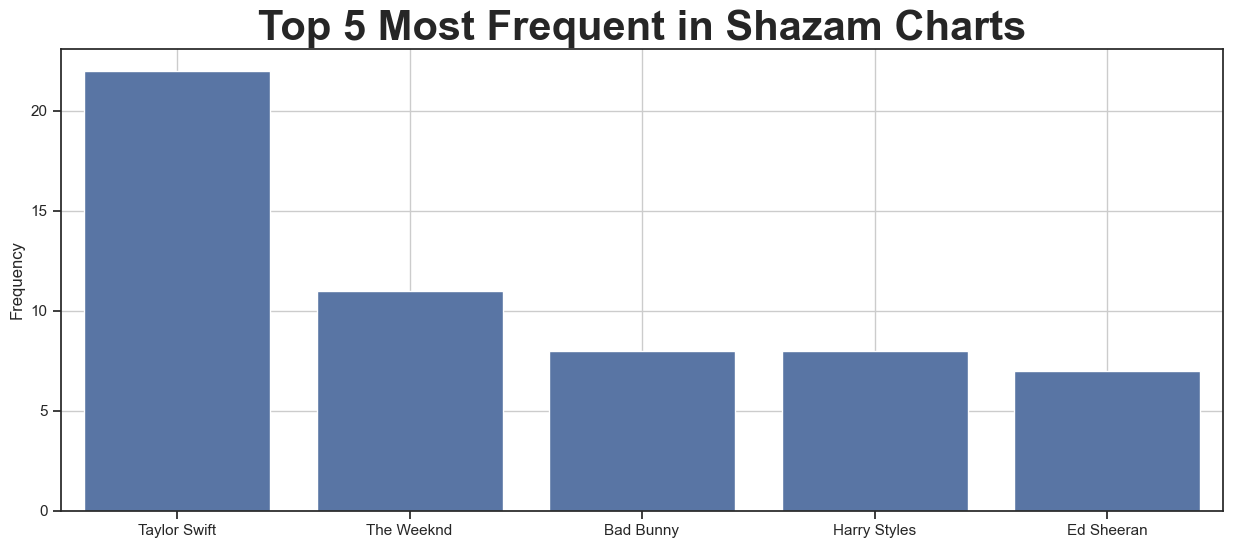

In [491]:
### Graphing the top 5 using the bar graph function defined just now
barg(spotchartdf,'Name','Frequency','Top 5 Most Frequent in Spotify Charts','Frequency')
barg(appchartdf,'Name','Frequency','Top 5 Most Frequent in Apple Charts','Frequency')
barg(deezchartdf,'Name','Frequency','Top 5 Most Frequent in Deezer Charts','Frequency')
barg(shachartdf,'Name','Frequency','Top 5 Most Frequent in Shazam Charts','Frequency')